This notebook contains the analysis of Bias correction with our own data.

How to manage to have pred as dataframe and not array ?

In [1]:
# import modules and functions

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# import data
from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6
from Functions_ImportData import import_treat_obs_NOAA
from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA
from Bias_correction_function import BC
from Bias_correction_function import treat_data_for_test

In [2]:
# import observation data
data_obs_NOAA=import_treat_obs_NOAA()

In [3]:
name_model = 'ACCESS-CM2'

In [4]:
# precipitation

In [5]:
climate_var = 'pr' # 'tas'

# precipitation : 'pr'

name_station = 'BEIRA, MZ'
name_project = 'WTP_Mutua_EIB'

In [6]:
climate_var_NEX_GDDP_CMIP6_Project=import_treat_modeled_NEX_GDDP_CMIP6(climate_var,'mm_per_day','day',1950,2100)

In [7]:
climate_var_NEX_GDDP_CMIP6_EmplacementStation=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, 'mm_per_day')

In [8]:
df_pr = treat_data_for_test(data_obs_NOAA,'PRCP',climate_var_NEX_GDDP_CMIP6_EmplacementStation,'Mean of the daily precipitation rate mm/day','BEIRA, MZ',name_model)

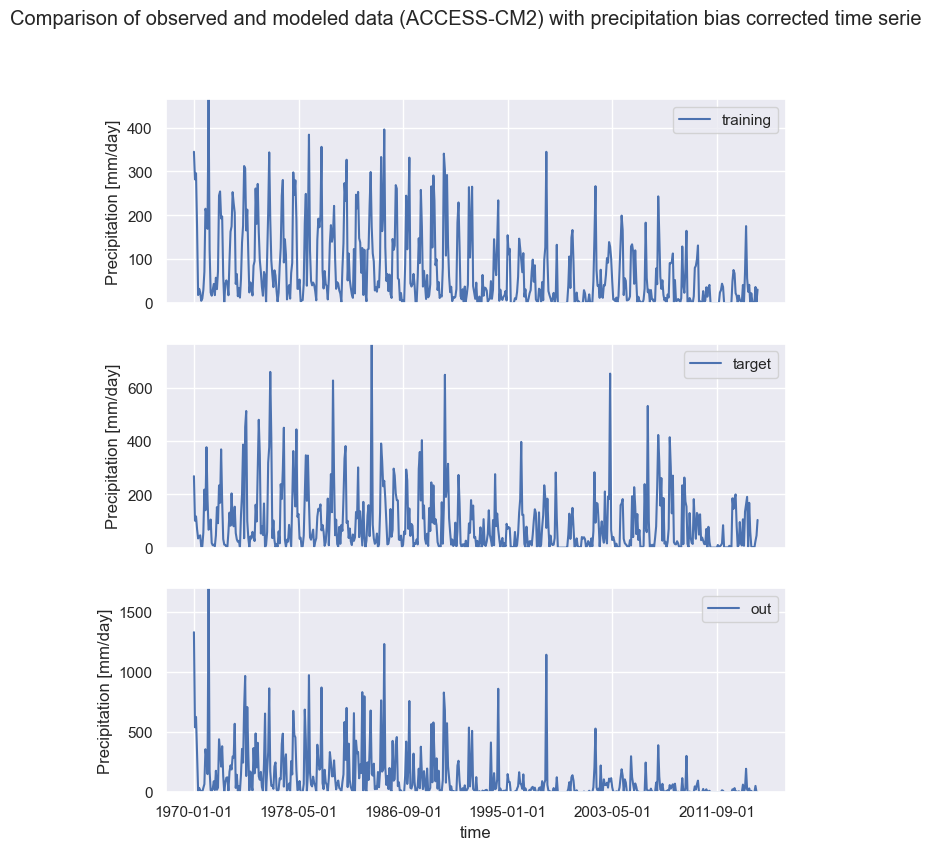

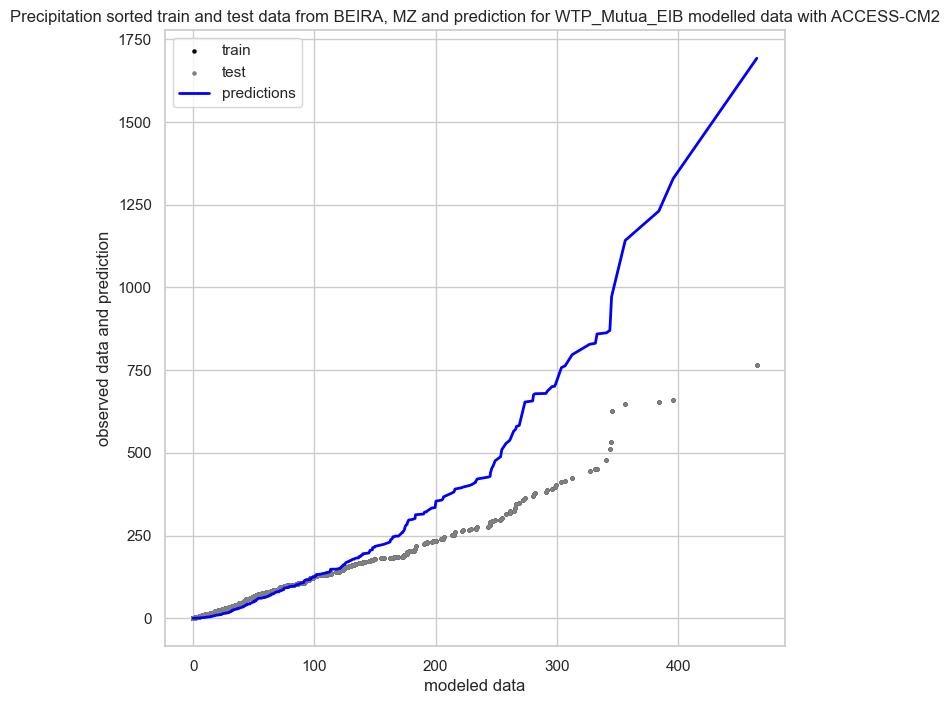

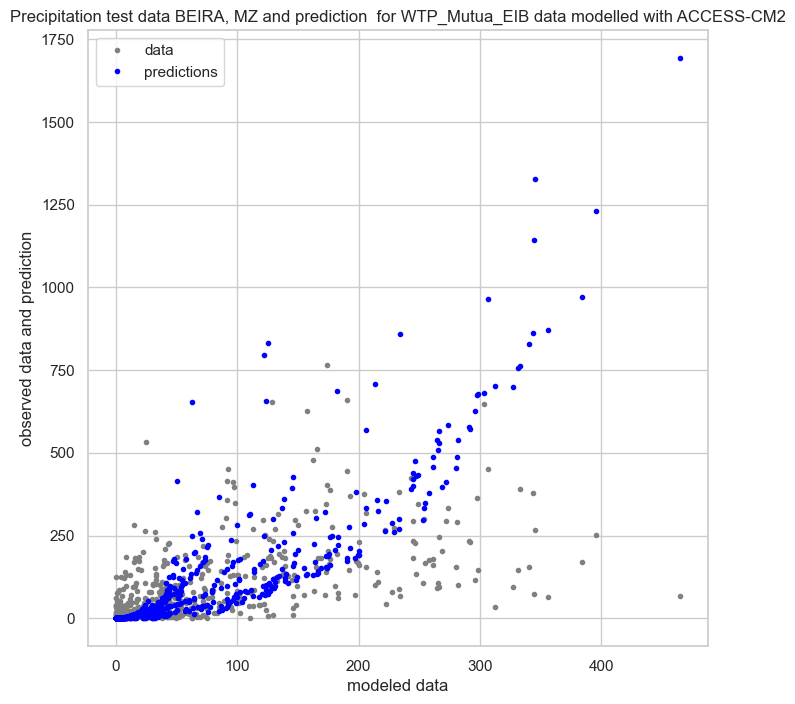

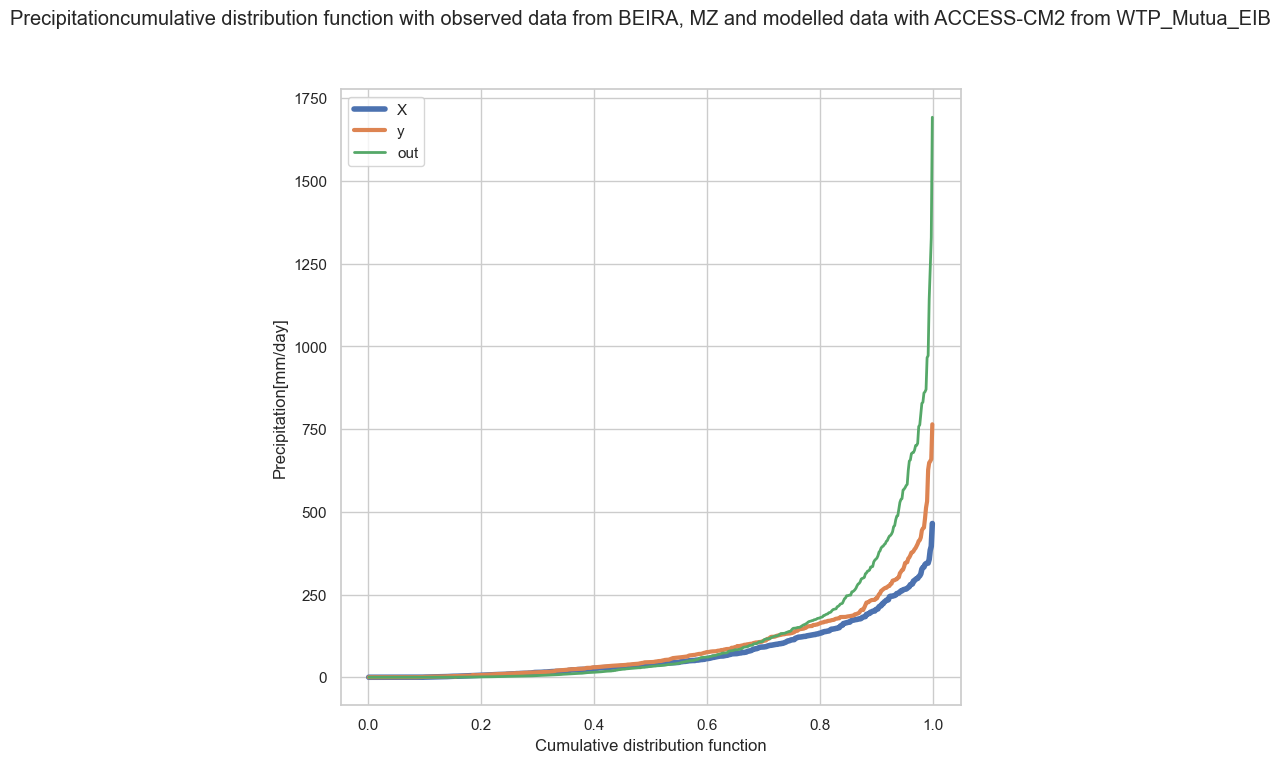

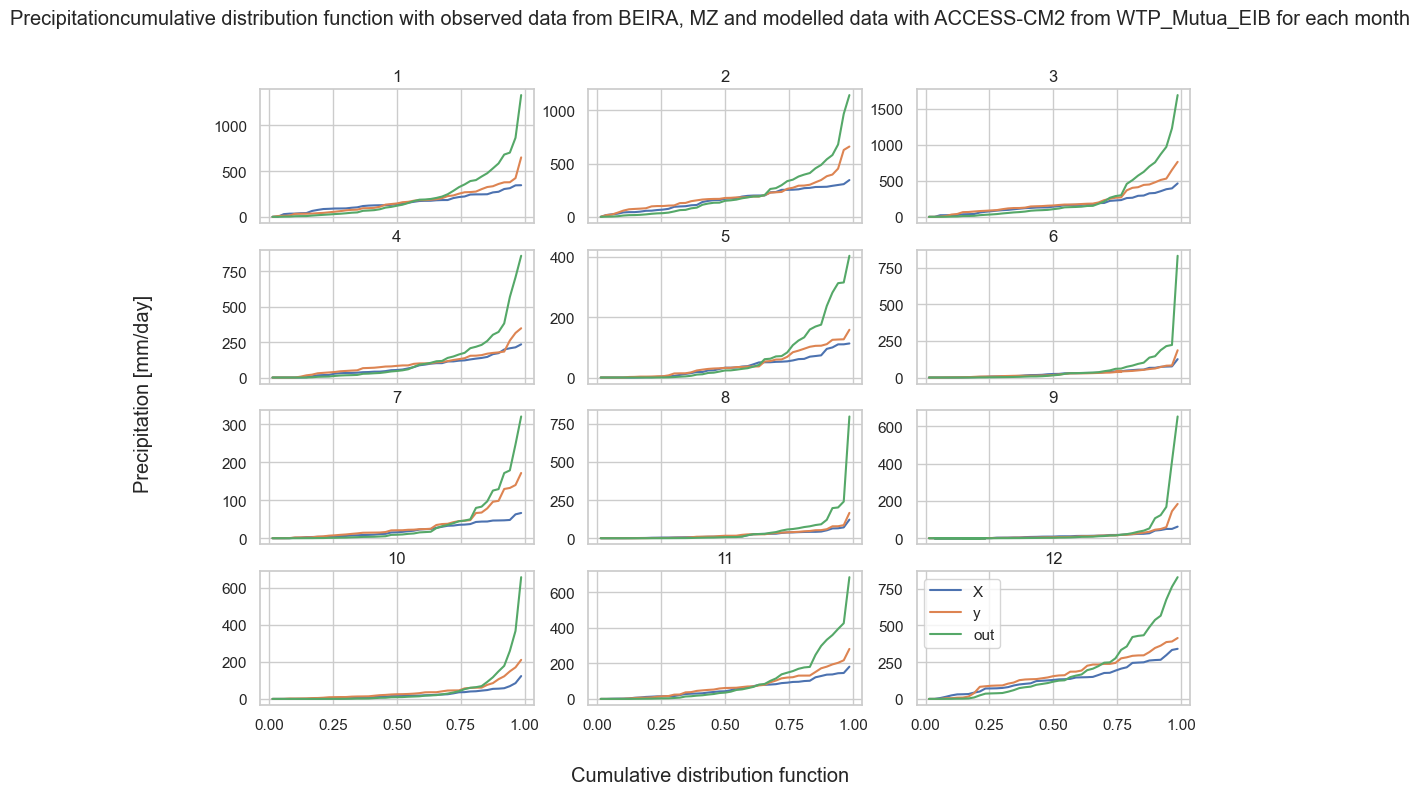

In [9]:
(pred)=BC(df_pr,'pcp','Bcsd_Precipitation',name_station,name_project,name_model)# results with resample by month
#(pr_pred_bcsd_temp)=BC(df_pr,'pcp','Bcsd_Precipitation',name_station,name_project,name_model)# results with resample by month

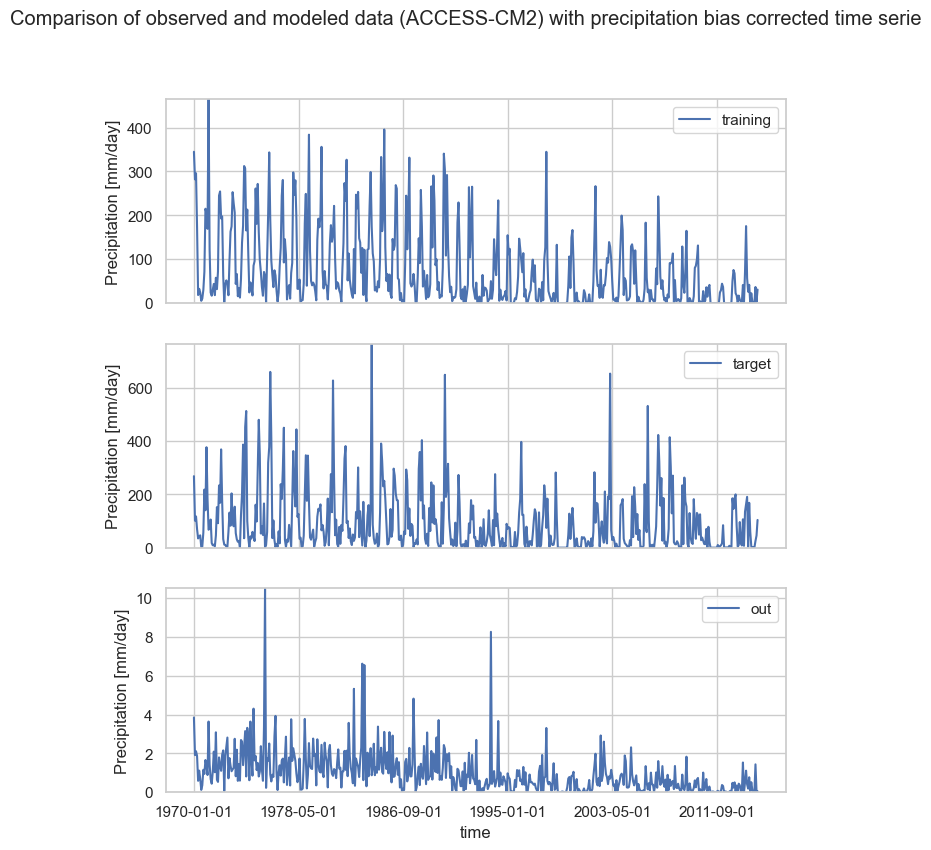

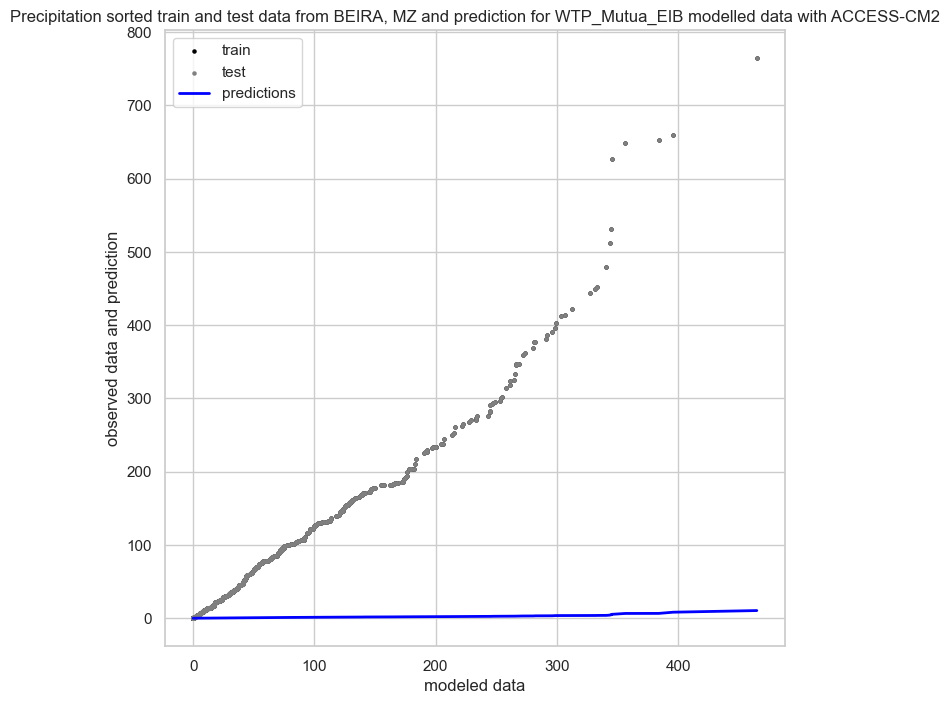

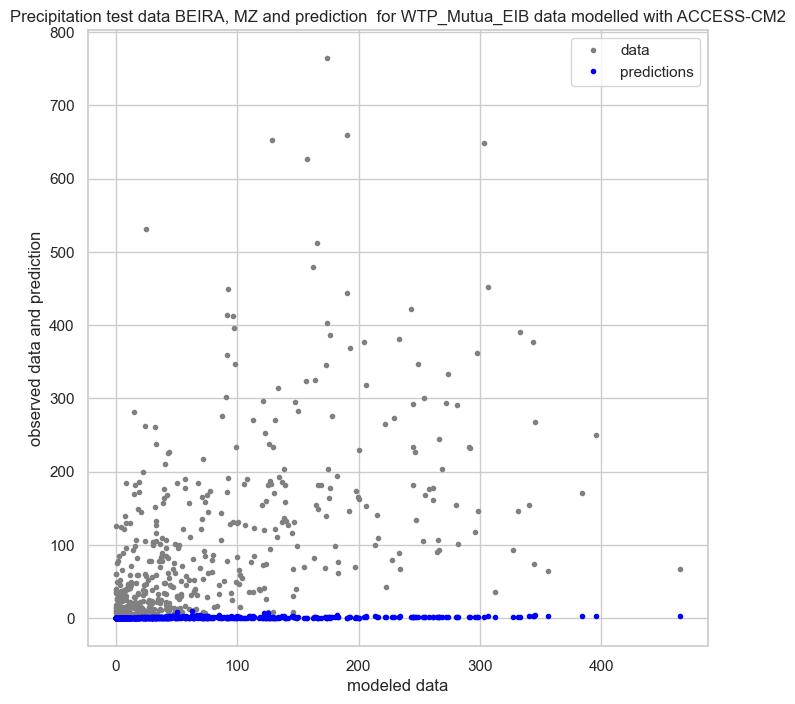

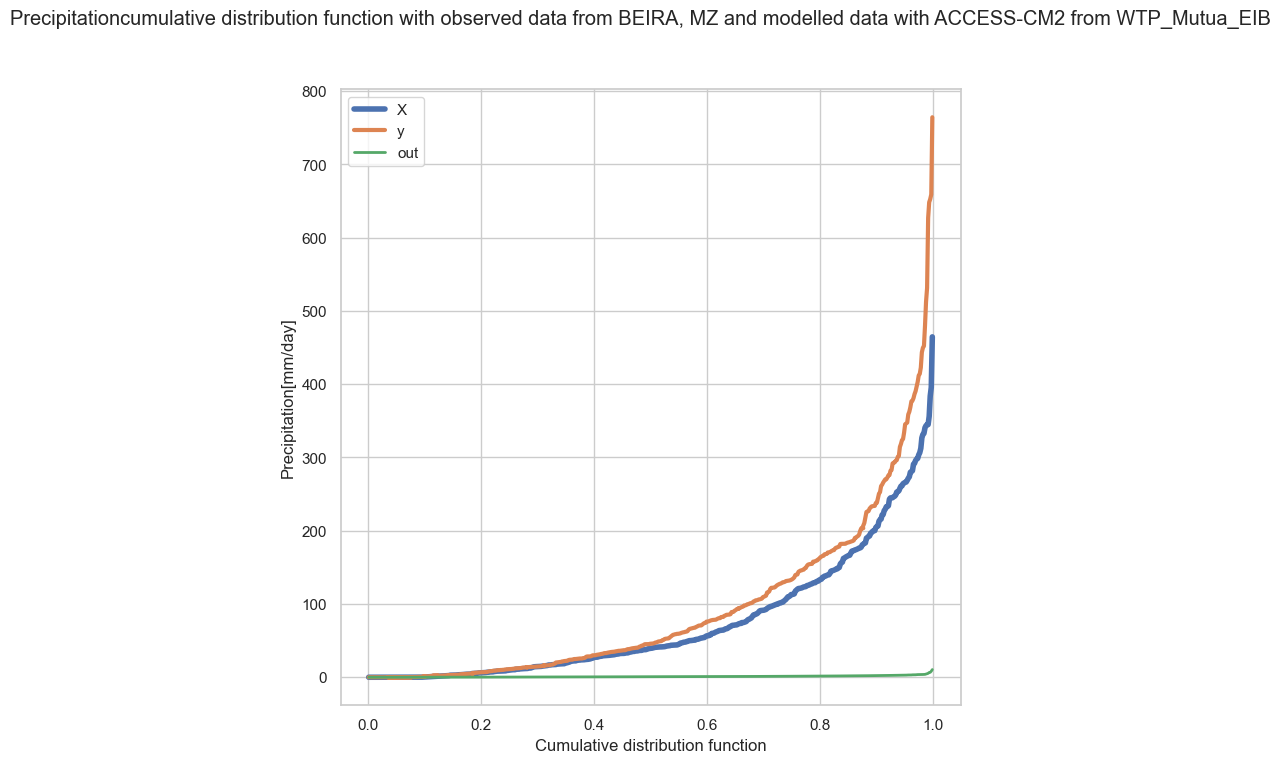

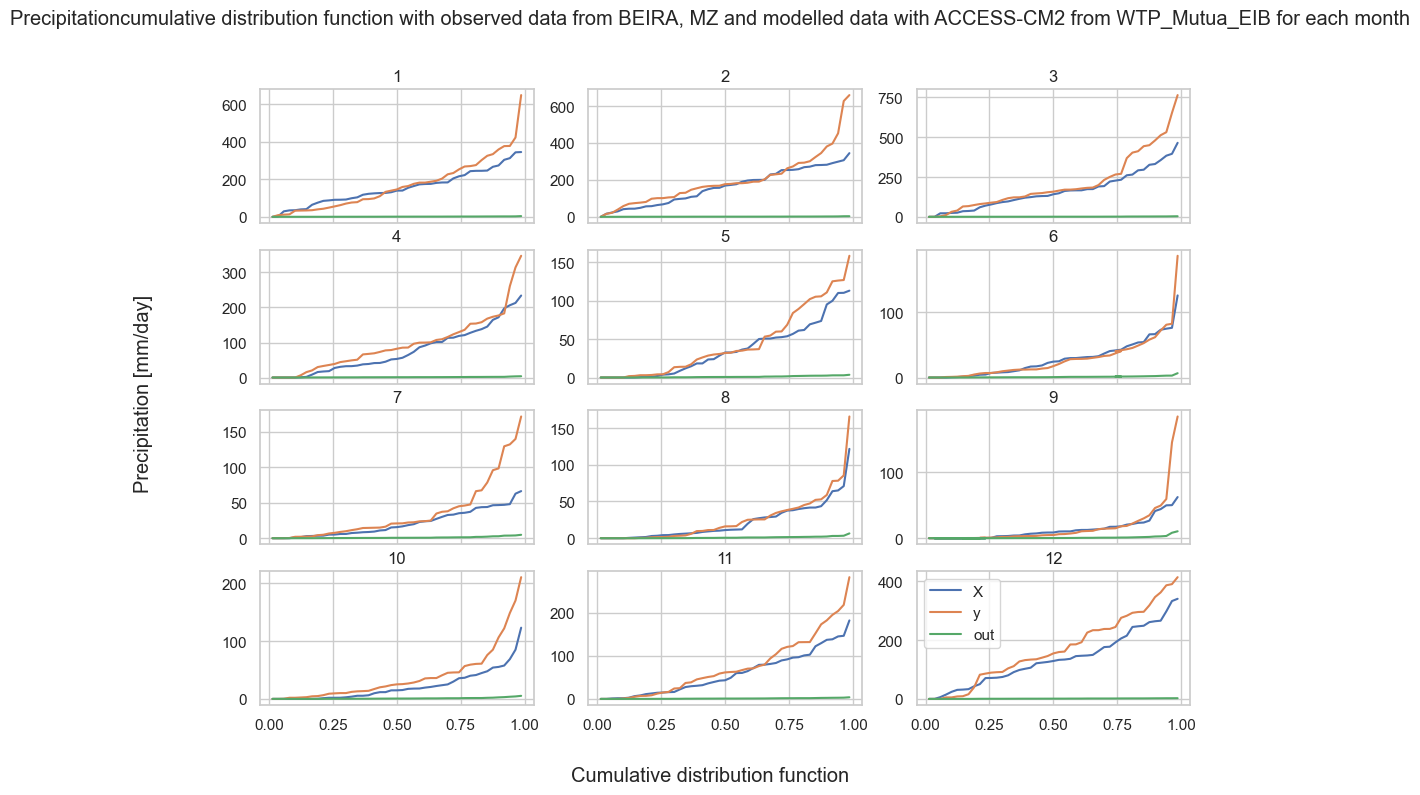

In [10]:
(pred)=BC(df_pr,'pcp','BCSD_Precipitation_without_multi',name_station,name_project,name_model)

mean absolute error
5.109812685484859


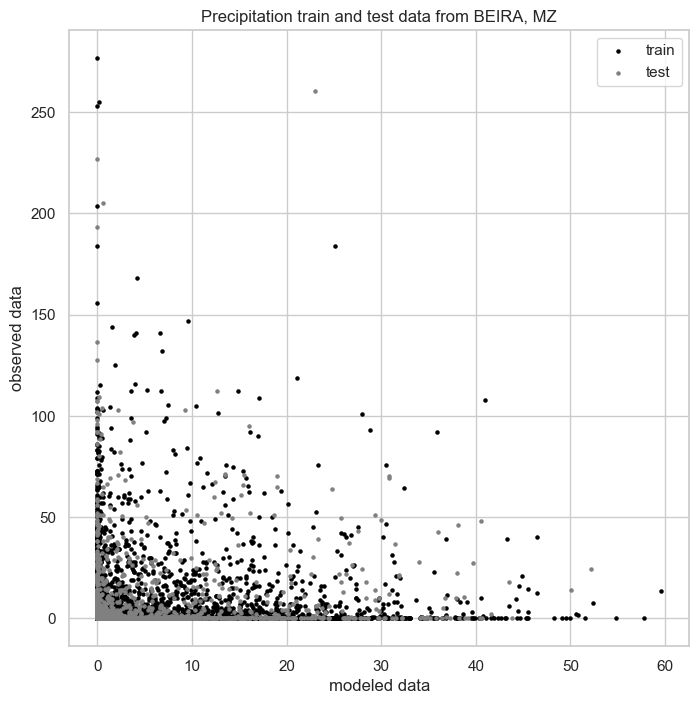

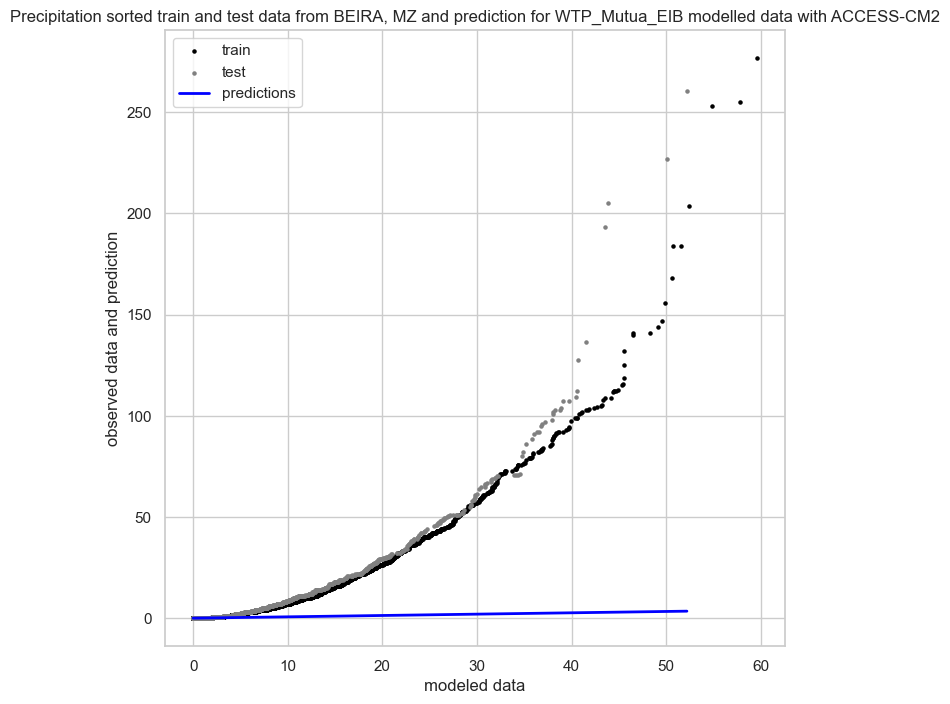

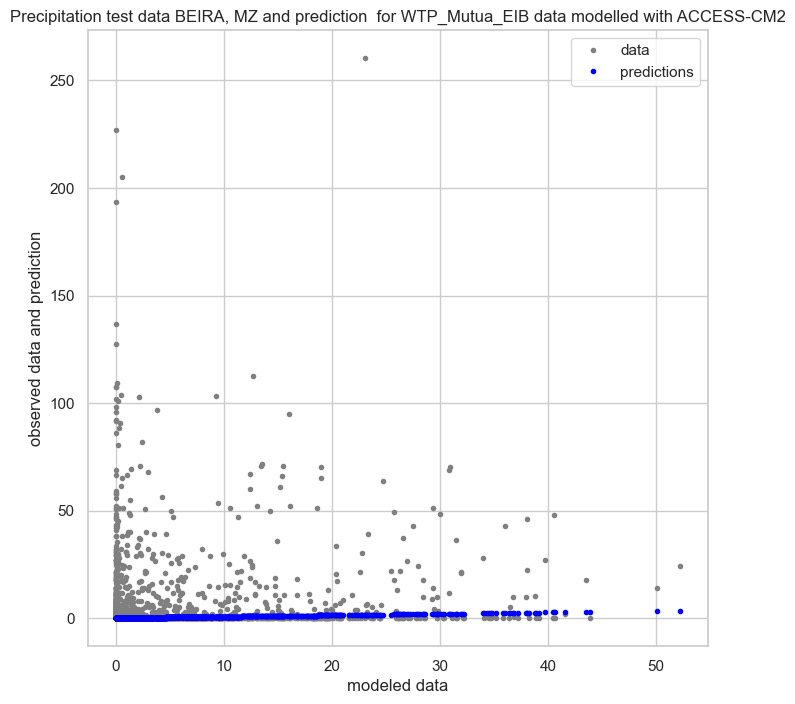

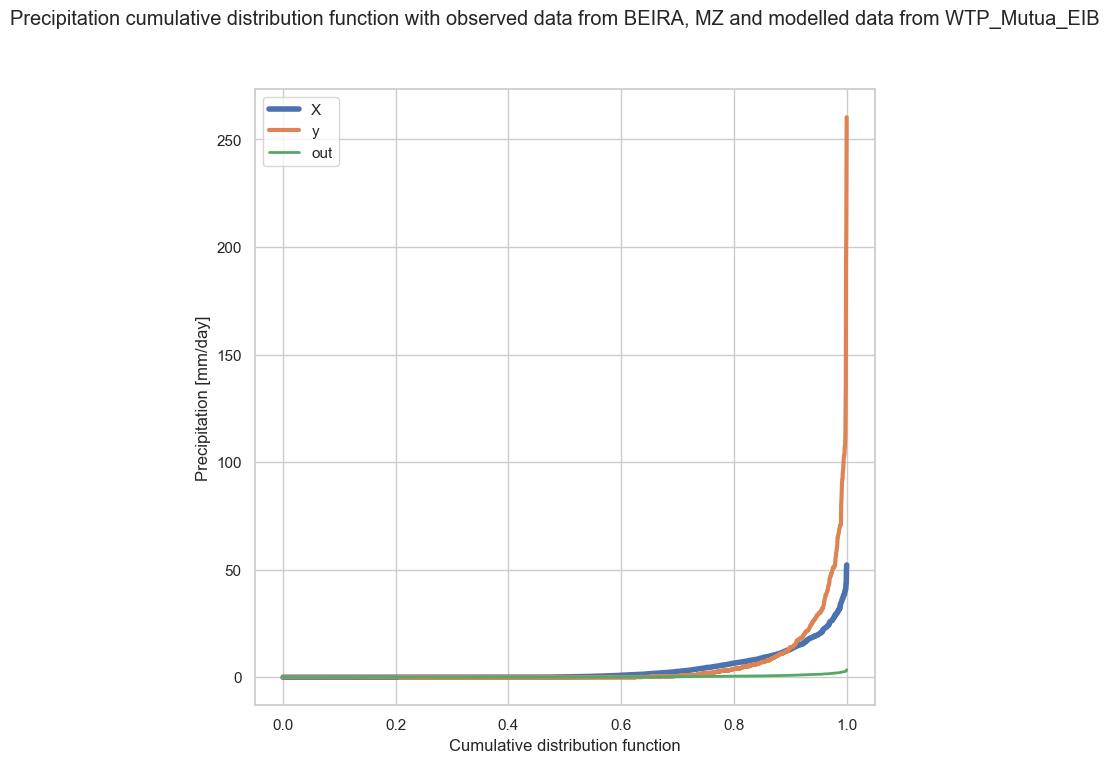

In [11]:
(pr_pred_q_lin)=BC(df_pr,'pcp','Quantile_Linear_Regression',name_station,name_project,name_model)

mean absolute error
4.244755104101252


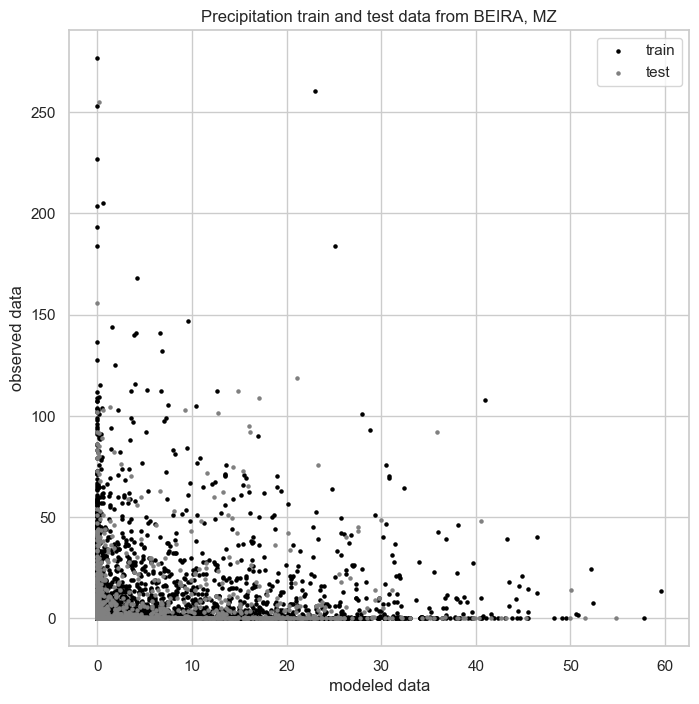

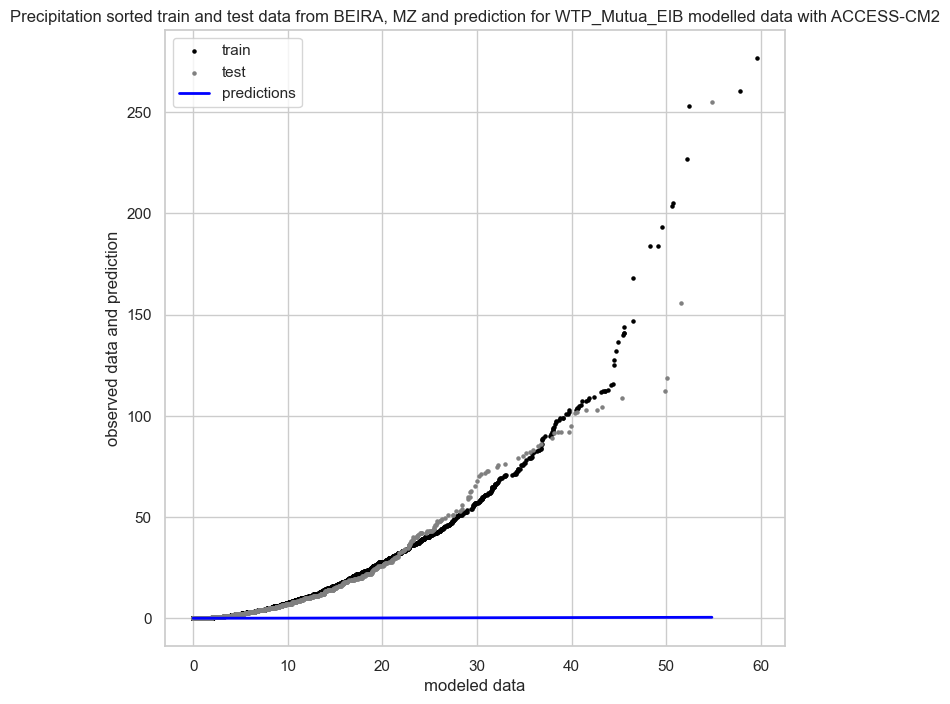

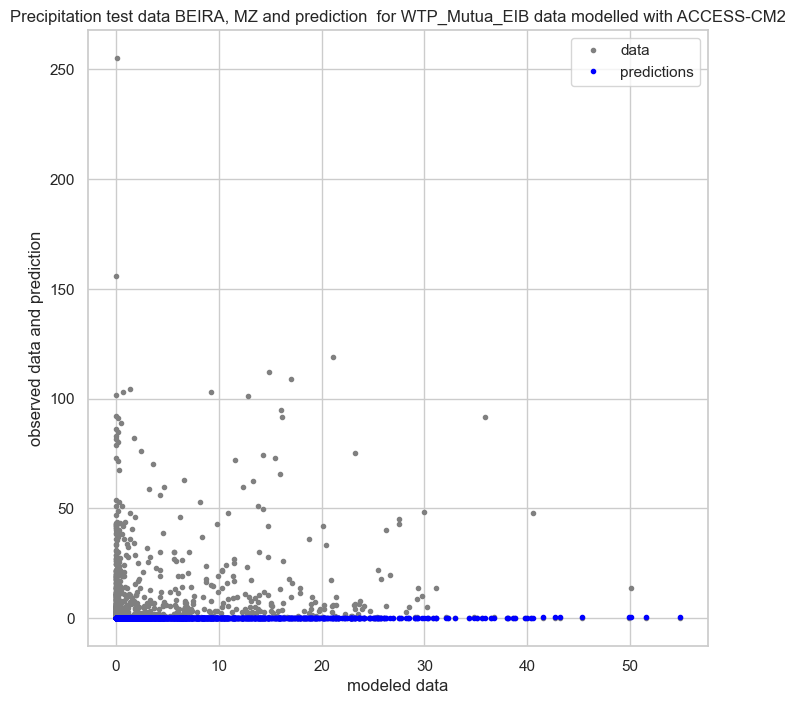

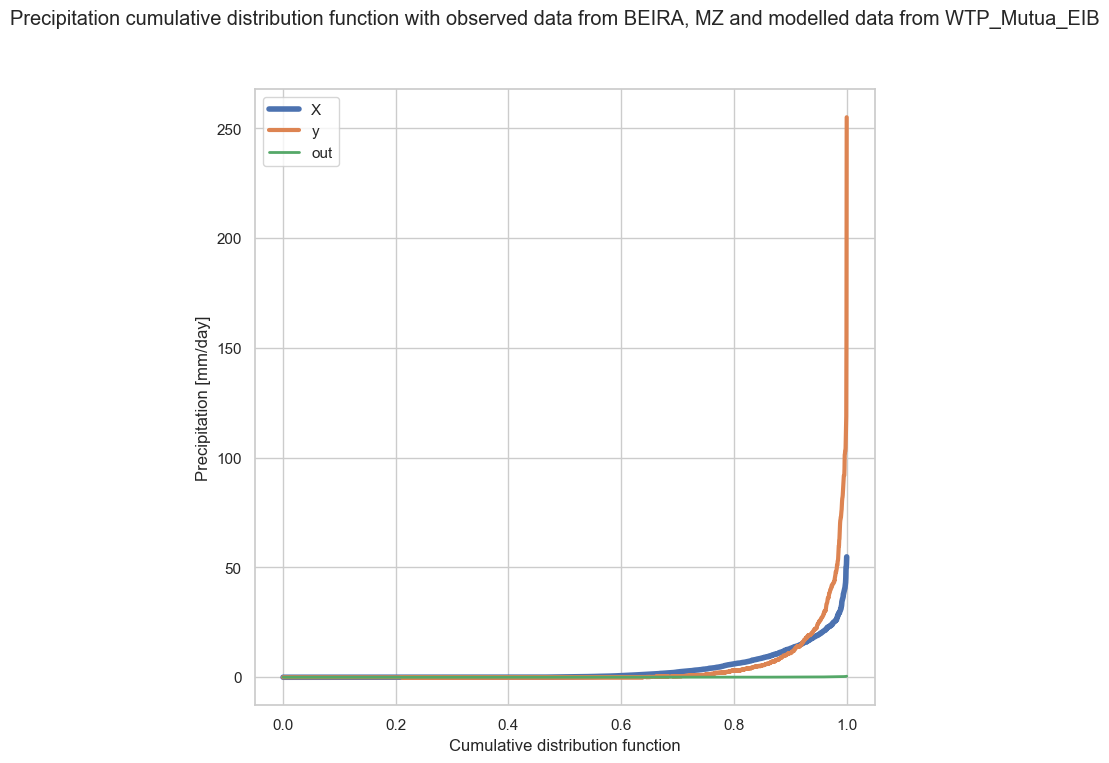

In [12]:
(pr_pred_q_mlpr)=BC(df_pr,'pcp','Quantile_MLP_Regressor',name_station,name_project,name_model)

R2 score
0.004907991696890268
0.004889803168507845
0.007099784374760443
Strategy chosen is quantile


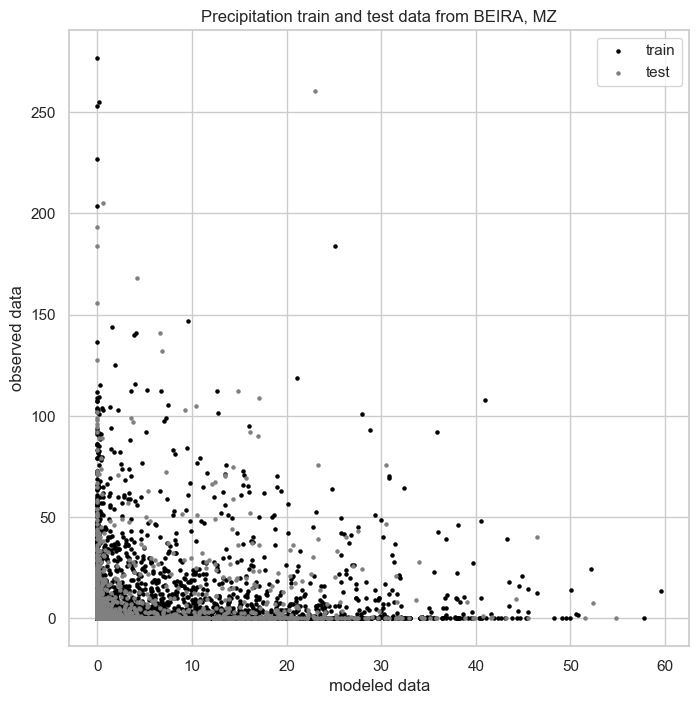

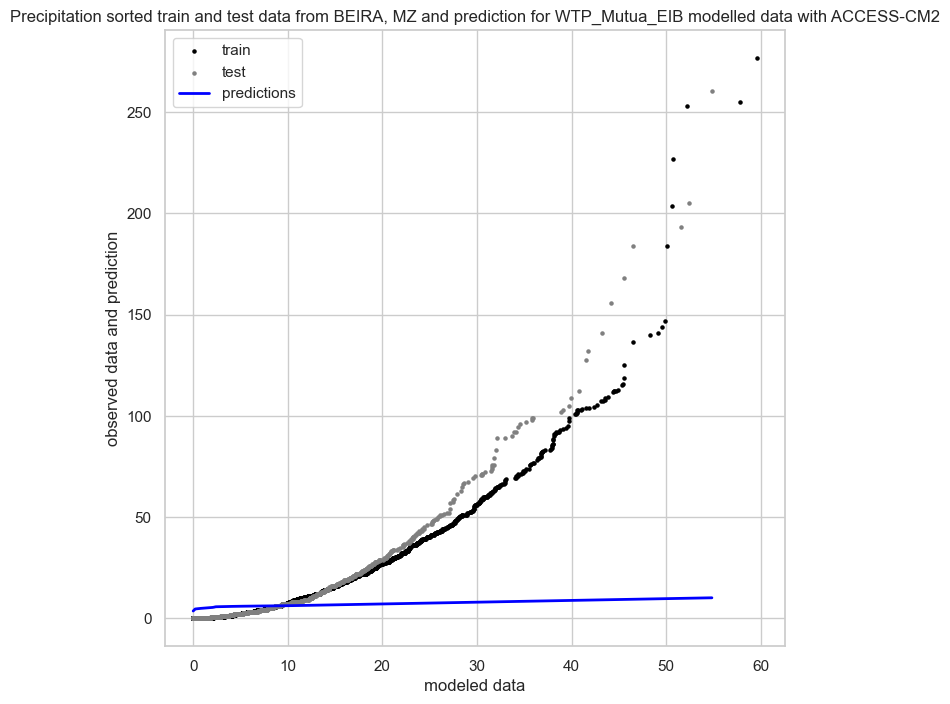

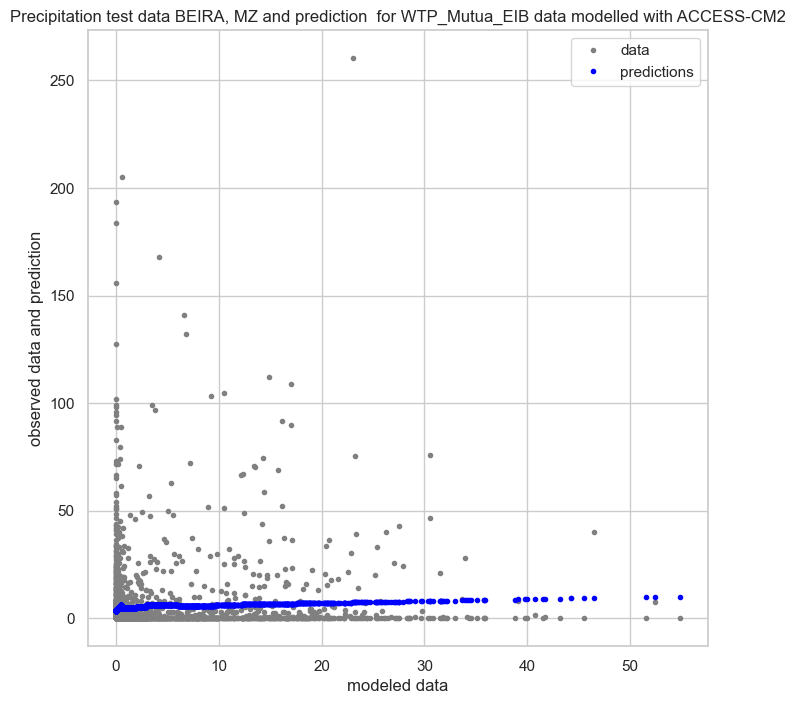

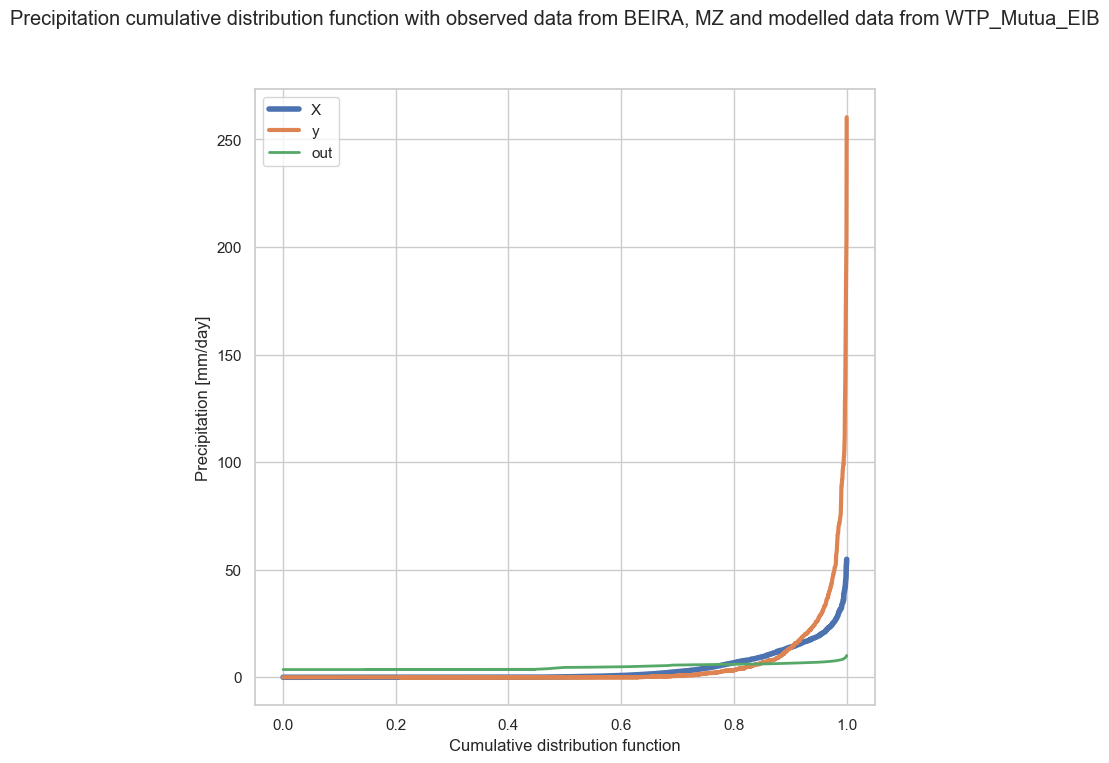

In [13]:
(pr_pred_p_reg)=BC(df_pr,'pcp','piecewise_regressor',name_station,name_project,name_model)

In [14]:
# temperature

In [15]:
climate_var = 'tas'

# precipitation : 'pr'
# temperature : 'tas'
# maximum temperature : tasmax
# minimum temperature : tasmin

name_station = 'BEIRA, MZ'
name_project = 'WTP_Mutua_EIB'

In [16]:
climate_var_NEX_GDDP_CMIP6_EmplacementStation_tas=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, 'Celsius')

In [17]:
df_tas = treat_data_for_test(data_obs_NOAA,'TAVG',climate_var_NEX_GDDP_CMIP6_EmplacementStation_tas,'Daily Near-Surface Air Temperature °C','BEIRA, MZ',name_model)

Check for nan values
temp    0
dtype: int64
temp    0
dtype: int64
Check for infinity values
temp    0
dtype: int64
temp    0
dtype: int64


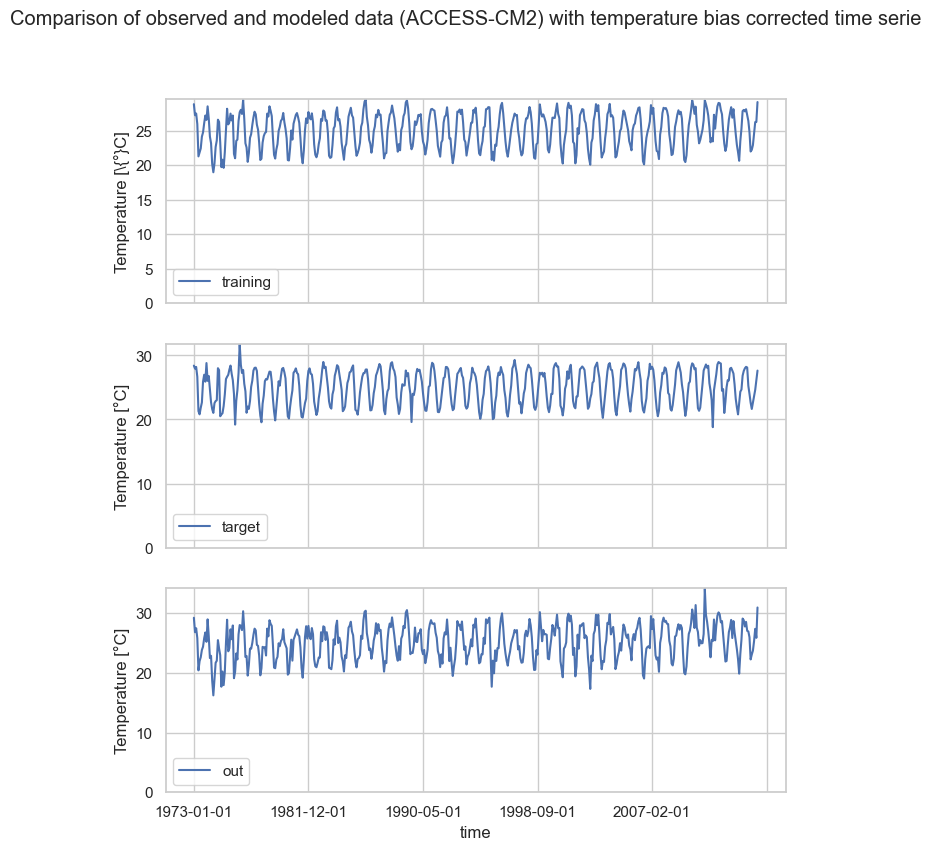

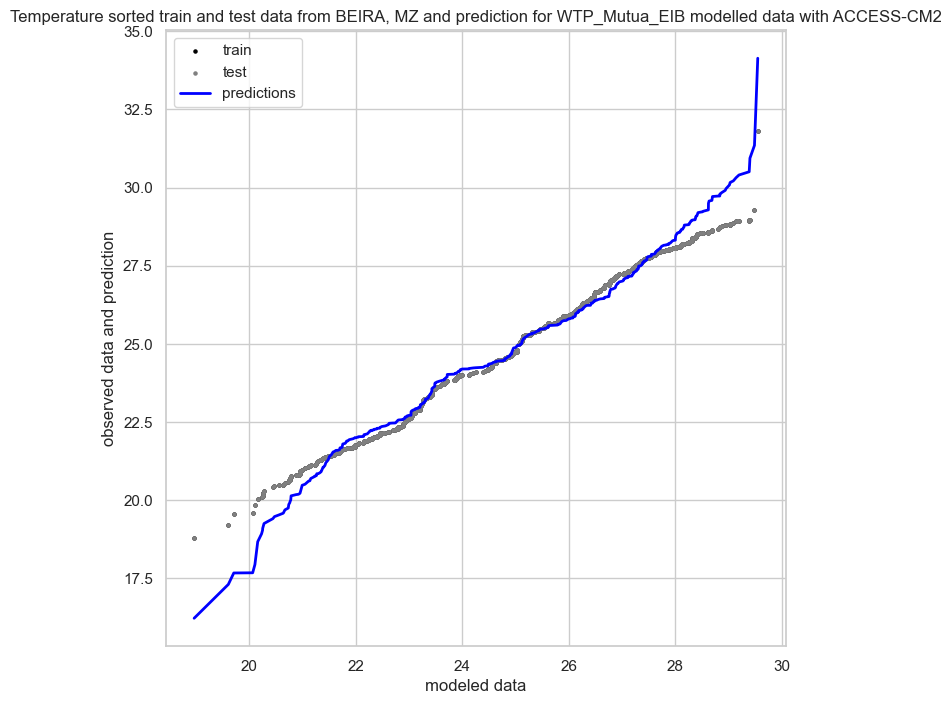

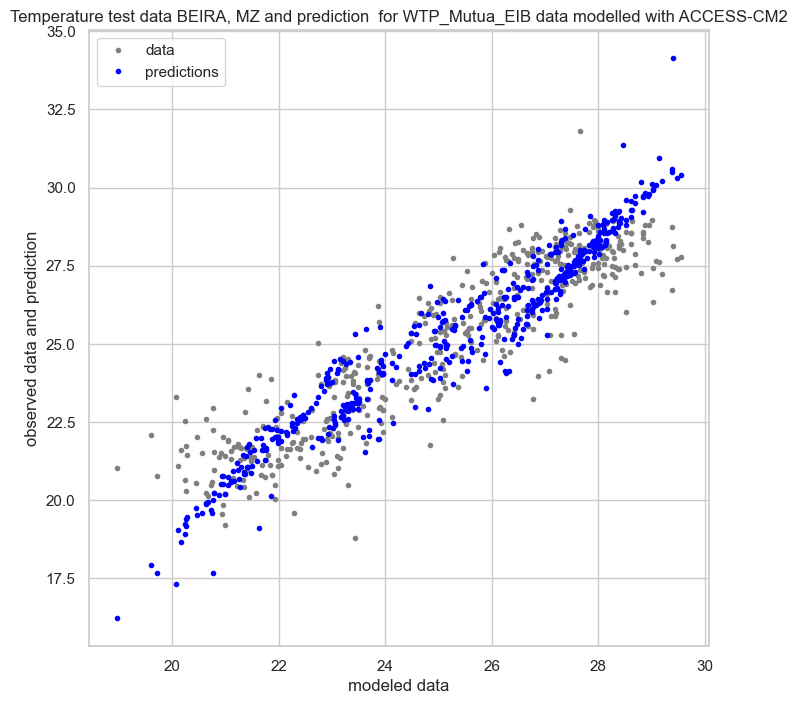

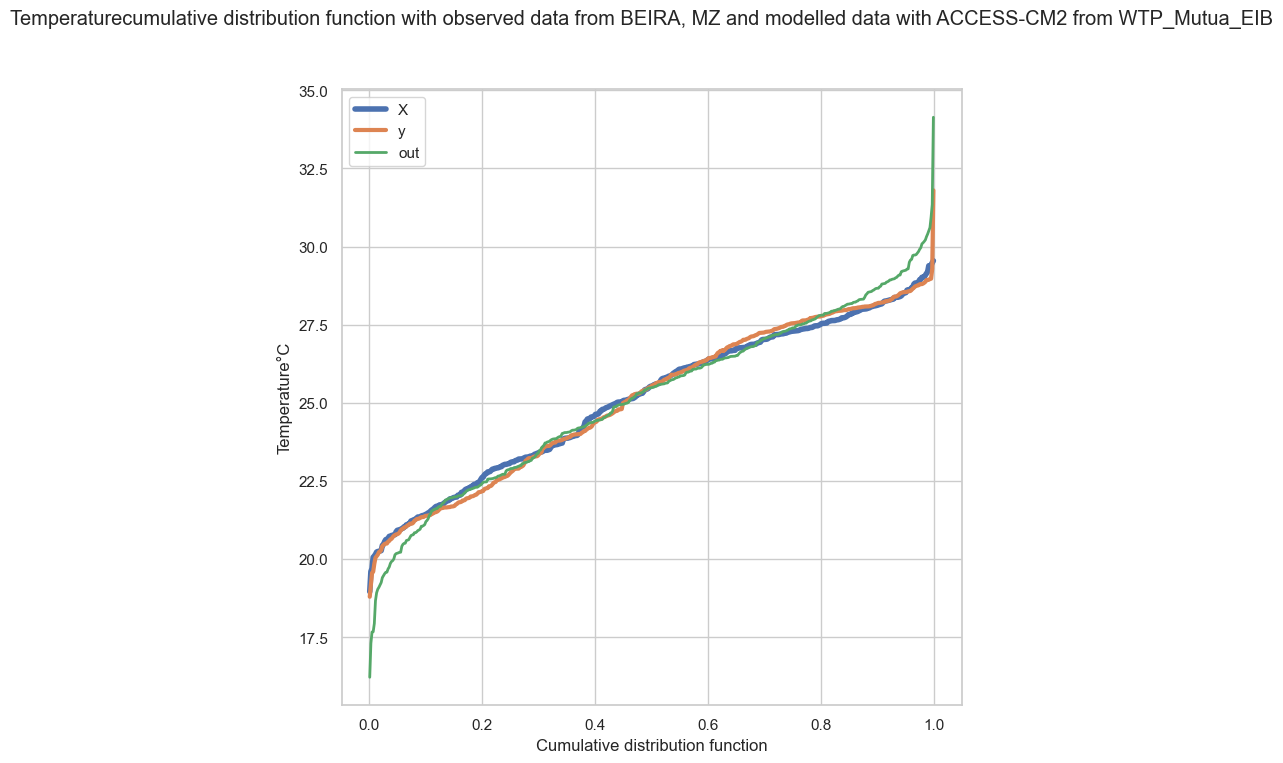

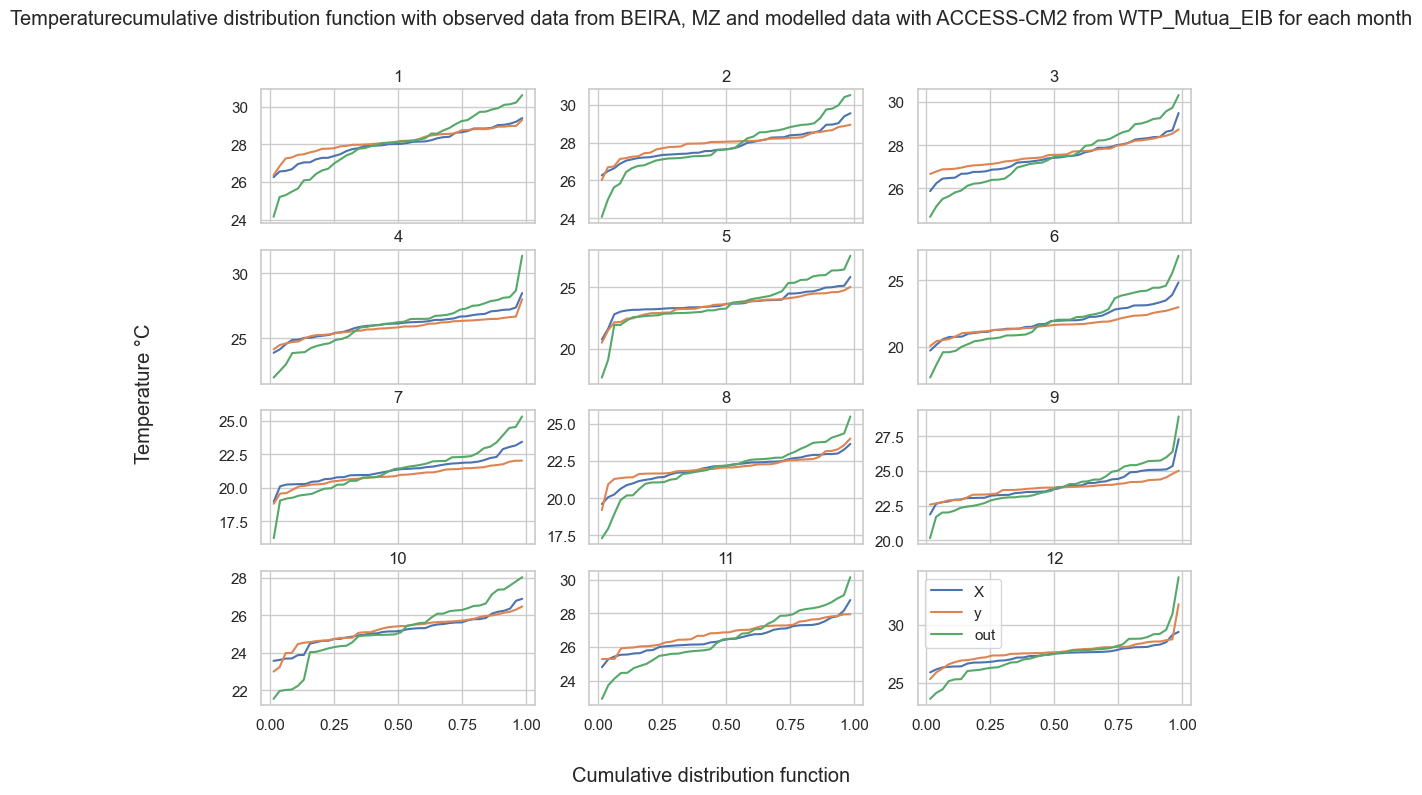

In [18]:
(tas_pred_bcsd_temp)=BC(df_tas,'temp','Bcsd_Temperature',name_station,name_project,name_model)# results without resample by month

Check for nan values
temp    0
dtype: int64
temp    0
dtype: int64
Check for infinity values
temp    0
dtype: int64
temp    0
dtype: int64


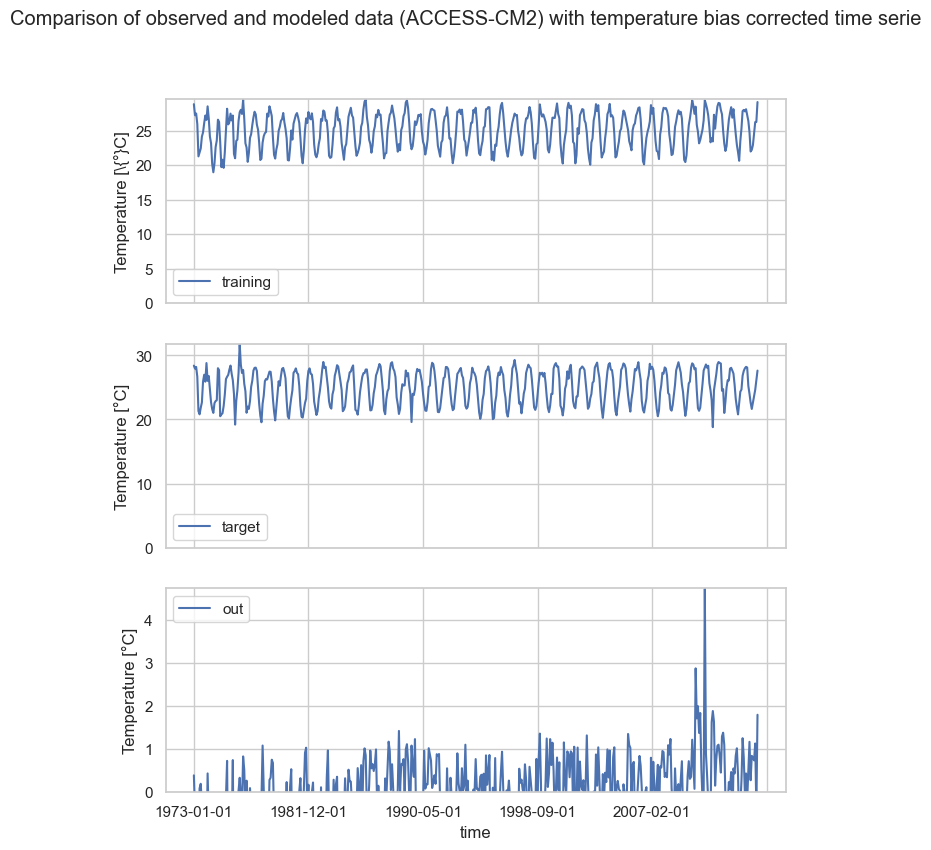

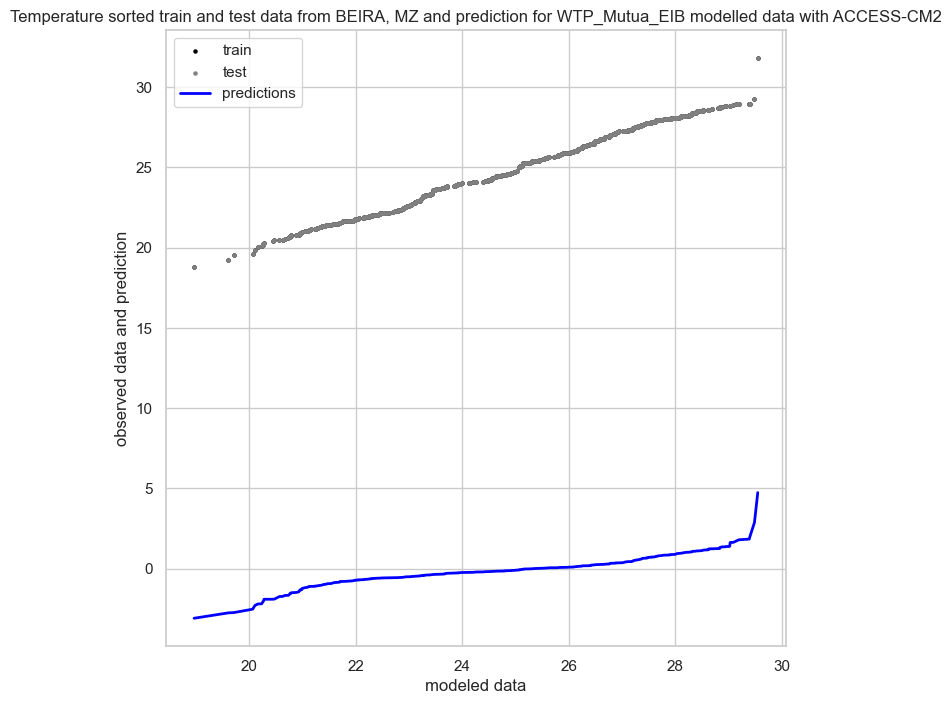

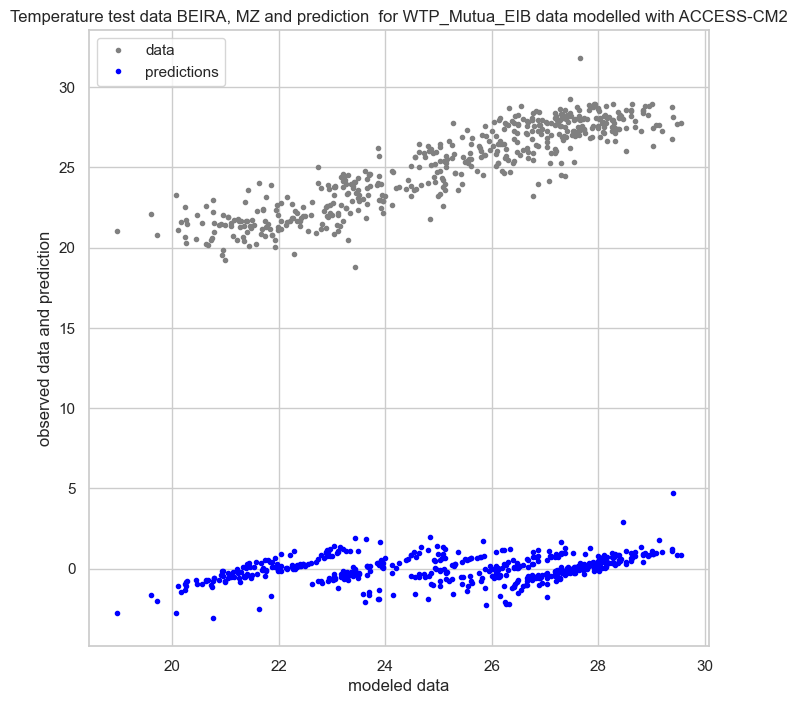

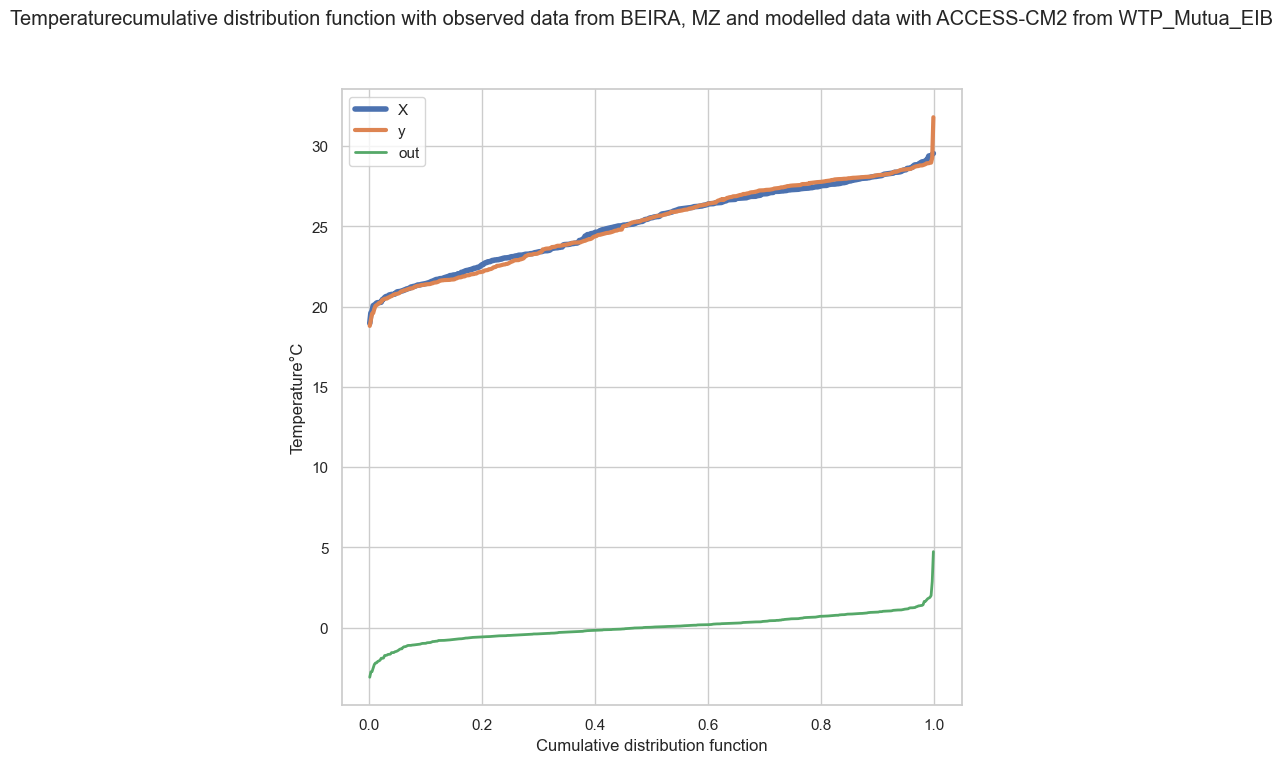

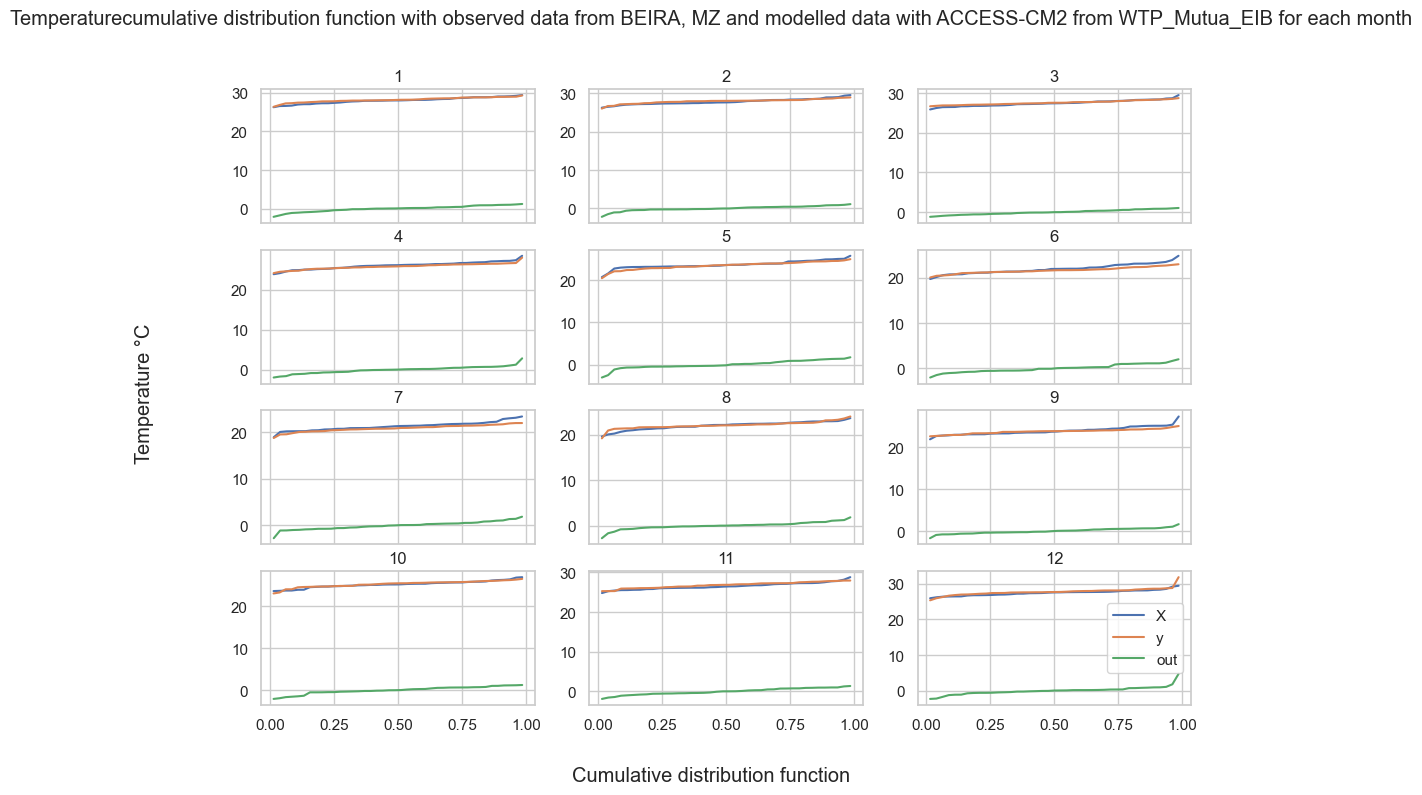

In [19]:
(tas_pred_bcsd_temp)=BC(df_tas,'temp','BCSD_Temperature_without_addition',name_station,name_project,name_model)# results without resample by month

mean absolute error
1.5543165956414924


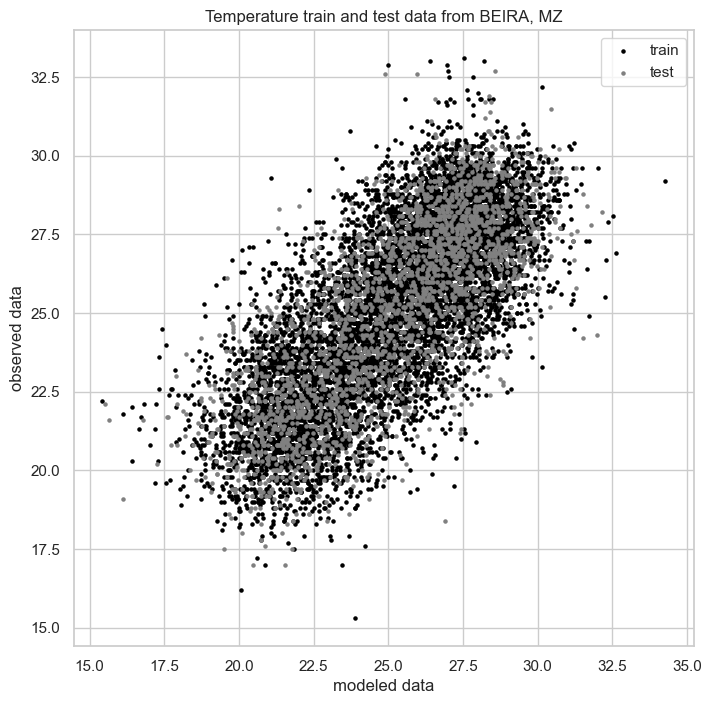

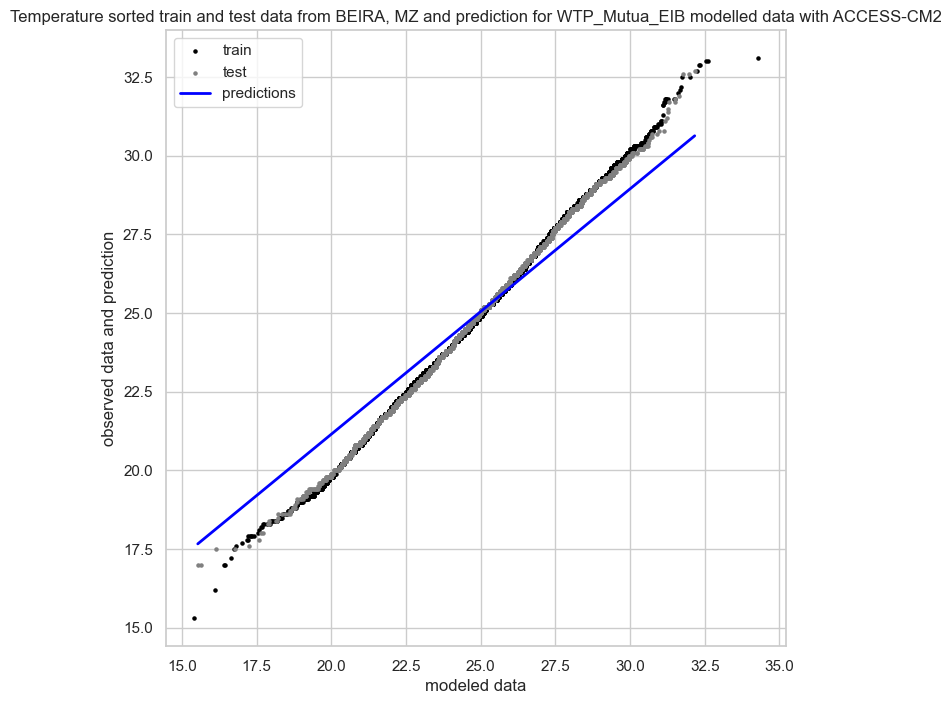

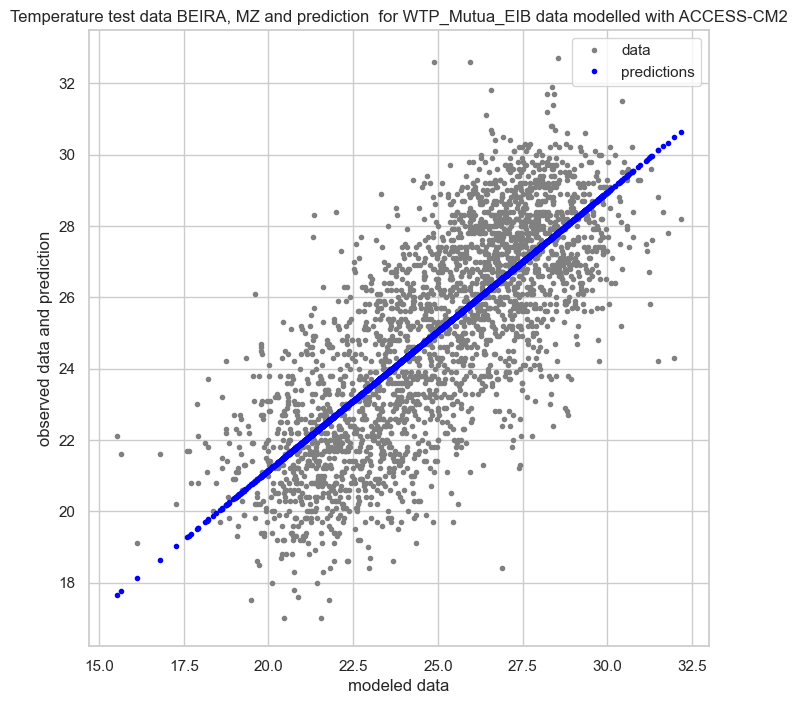

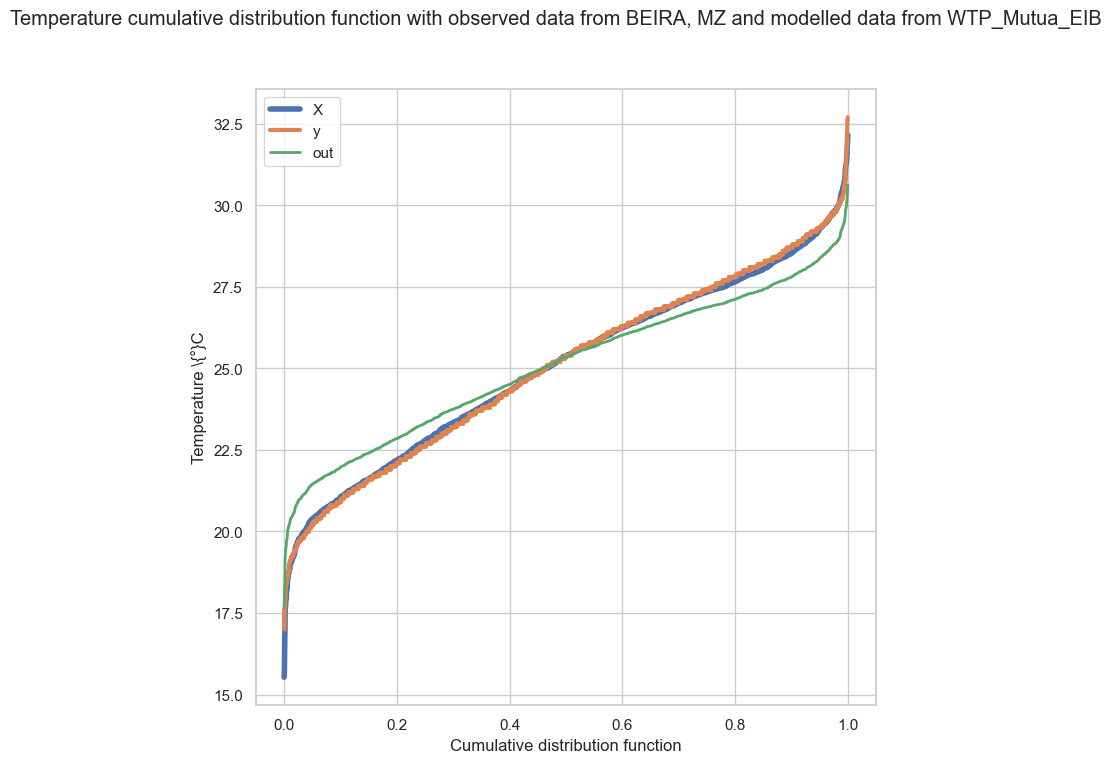

In [20]:
(tas_pred_q_lin)=BC(df_tas,'temp','Quantile_Linear_Regression',name_station,name_project,name_model)

R2 score
0.5717663882317379
0.5700457494492892
0.5716138456082979
Strategy chosen is kmeans


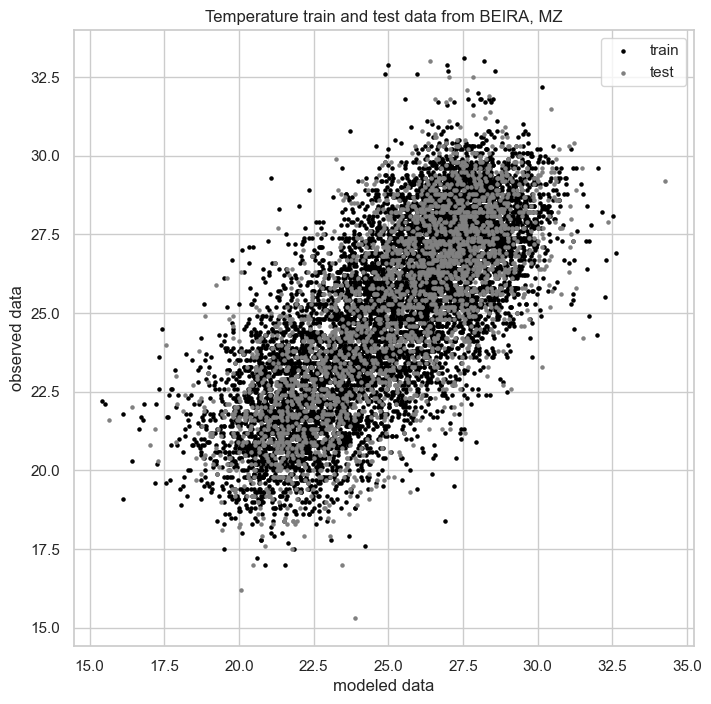

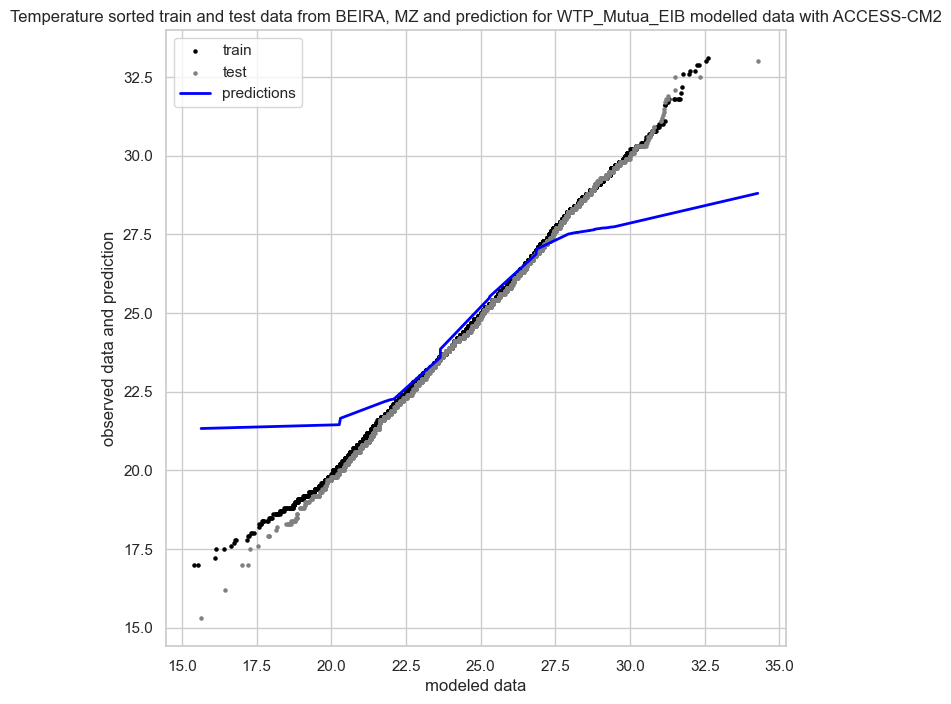

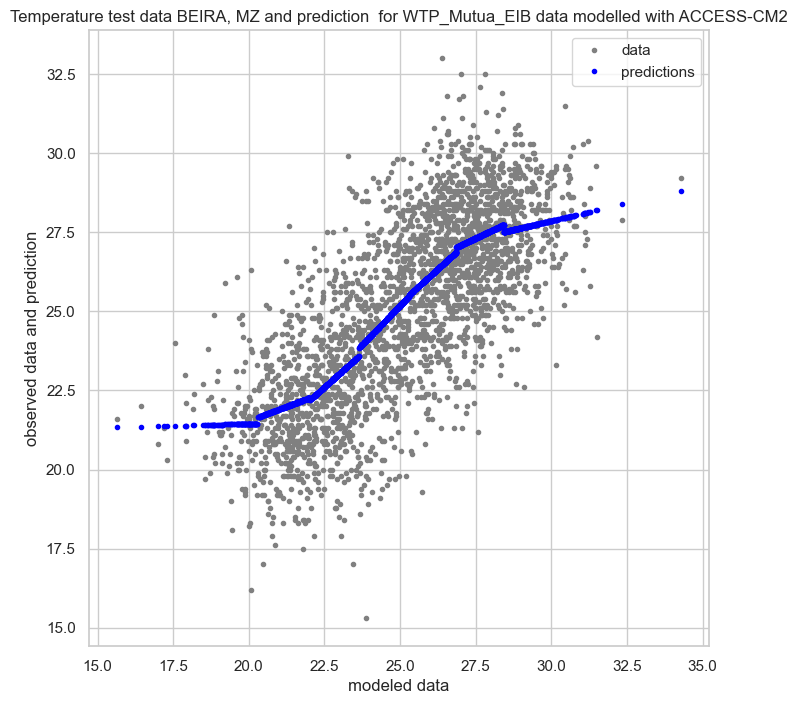

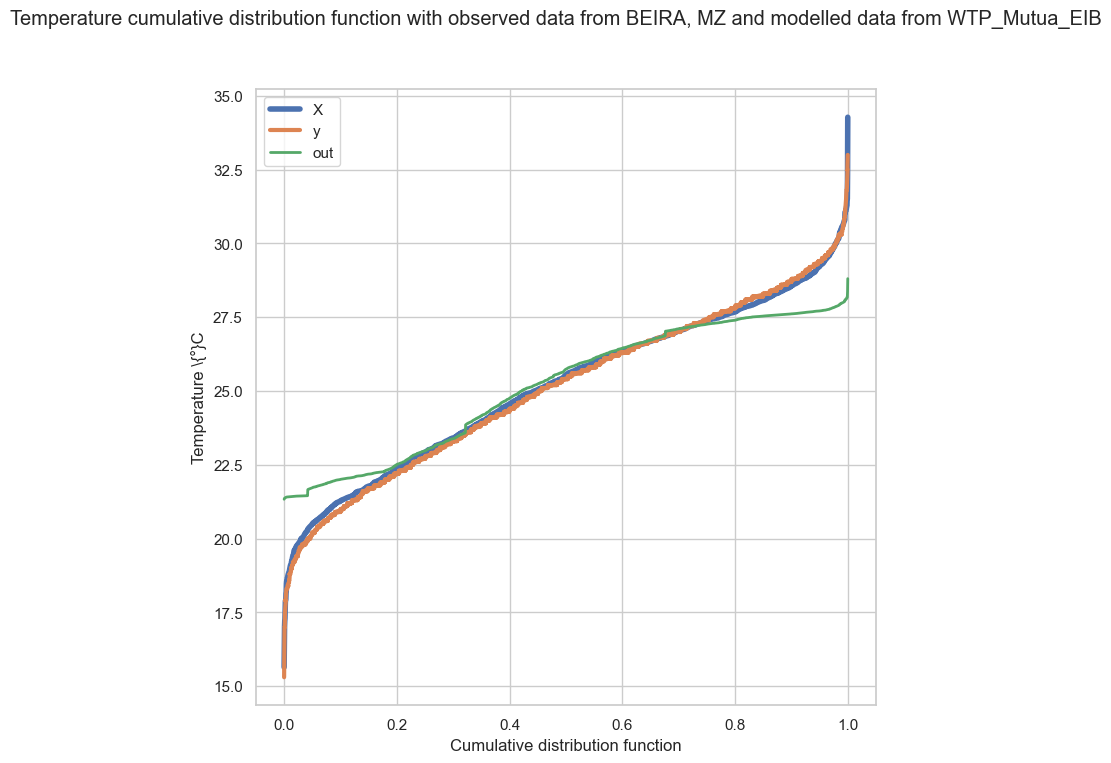

In [21]:
(tas_pred_p_reg)=BC(df_tas,'temp','piecewise_regressor',name_station,name_project,name_model)

In [22]:
# maximum temperature

In [23]:
climate_var = 'tasmax'

# precipitation : 'pr'
# temperature : 'tas'
# maximum temperature : tasmax
# minimum temperature : tasmin

name_station = 'BEIRA, MZ'
name_project = 'WTP_Mutua_EIB'

In [24]:
climate_var_NEX_GDDP_CMIP6_EmplacementStation_tasmax=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, 'Celsius')
df_tasmax = treat_data_for_test(data_obs_NOAA,'TMAX',climate_var_NEX_GDDP_CMIP6_EmplacementStation_tasmax,'Daily Maximum Near-Surface Air Temperature °C','BEIRA, MZ',name_model)

Check for nan values
temp_max    0
dtype: int64
temp_max    0
dtype: int64
Check for infinity values
temp_max    0
dtype: int64
temp_max    0
dtype: int64


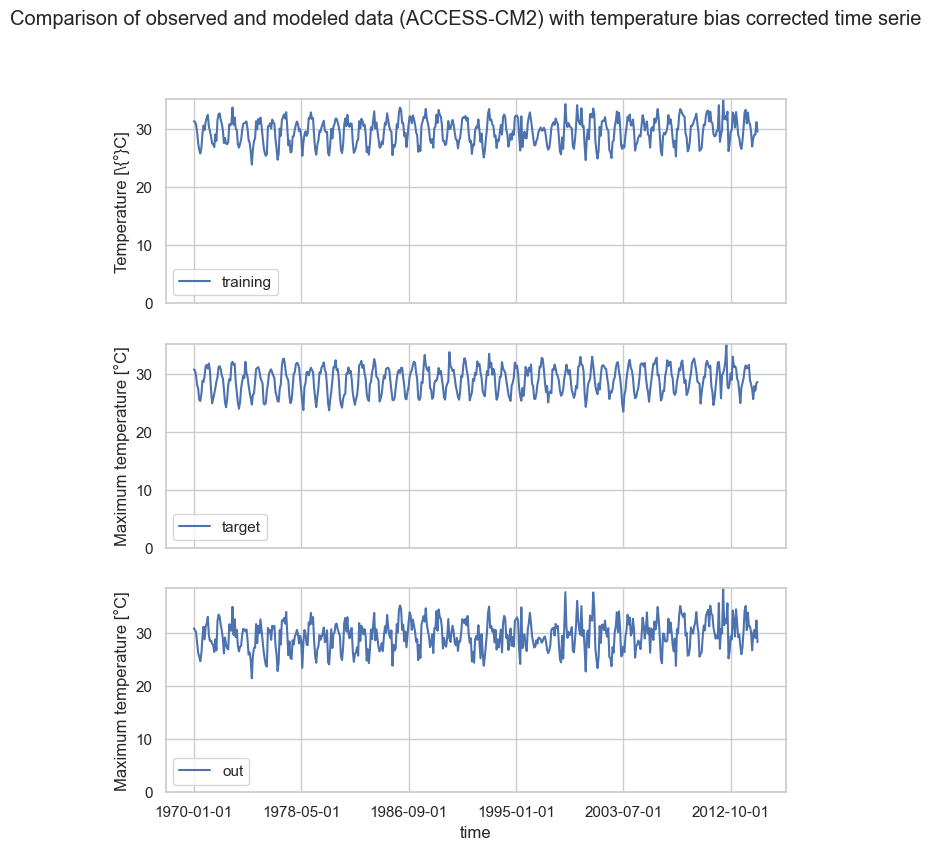

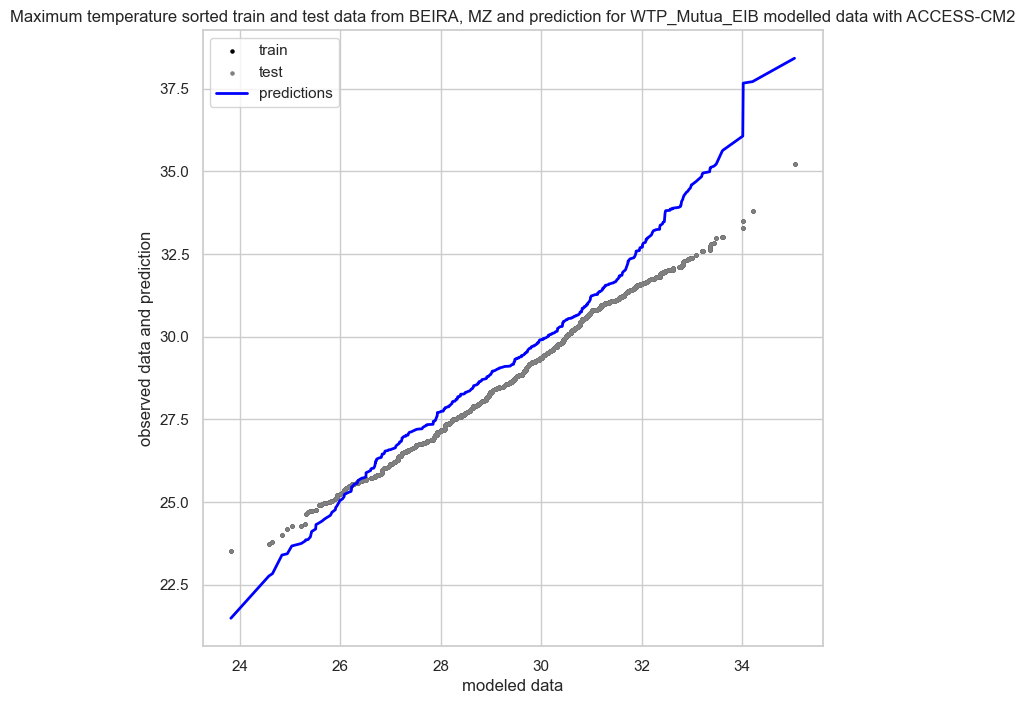

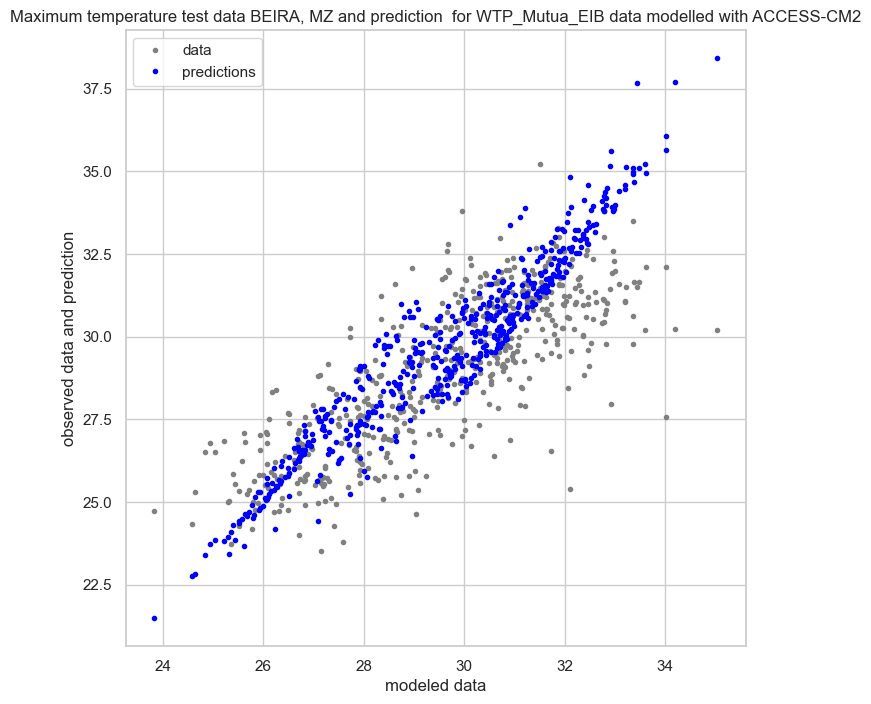

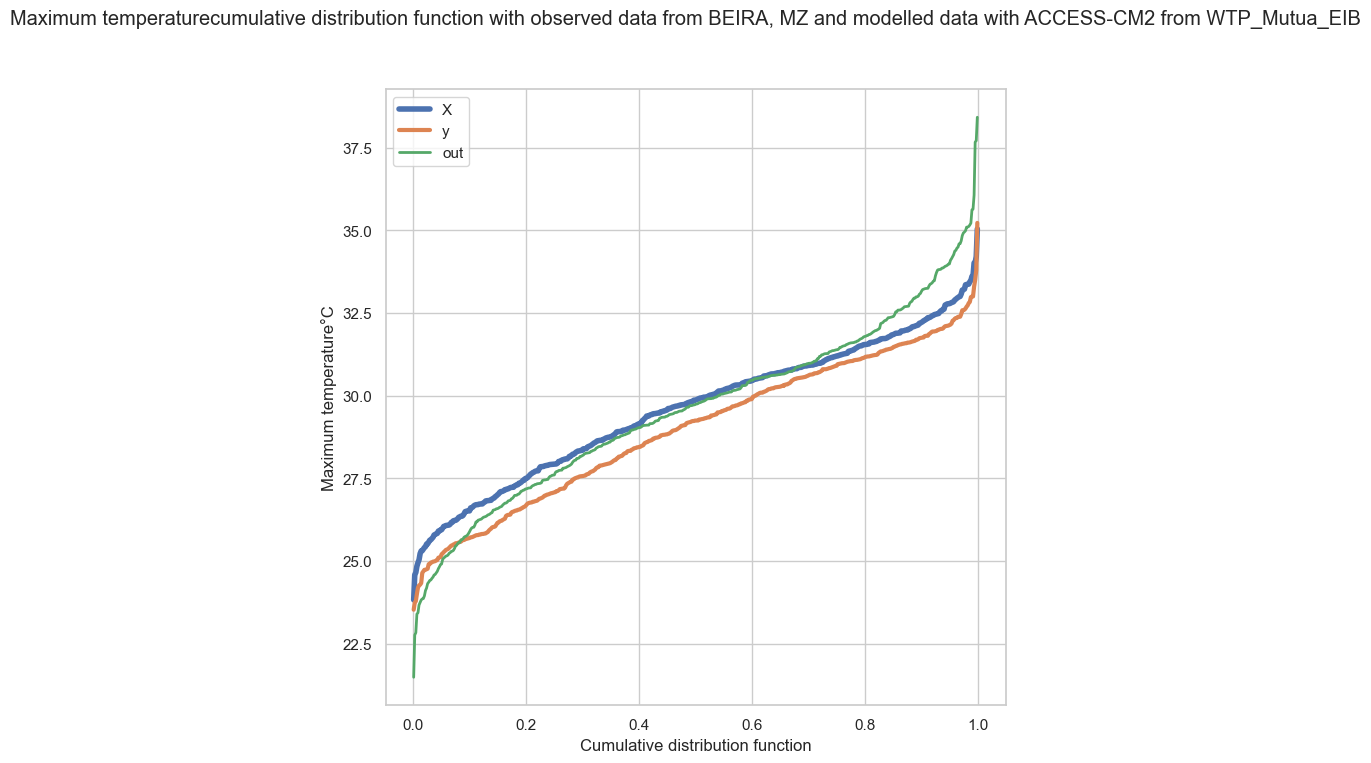

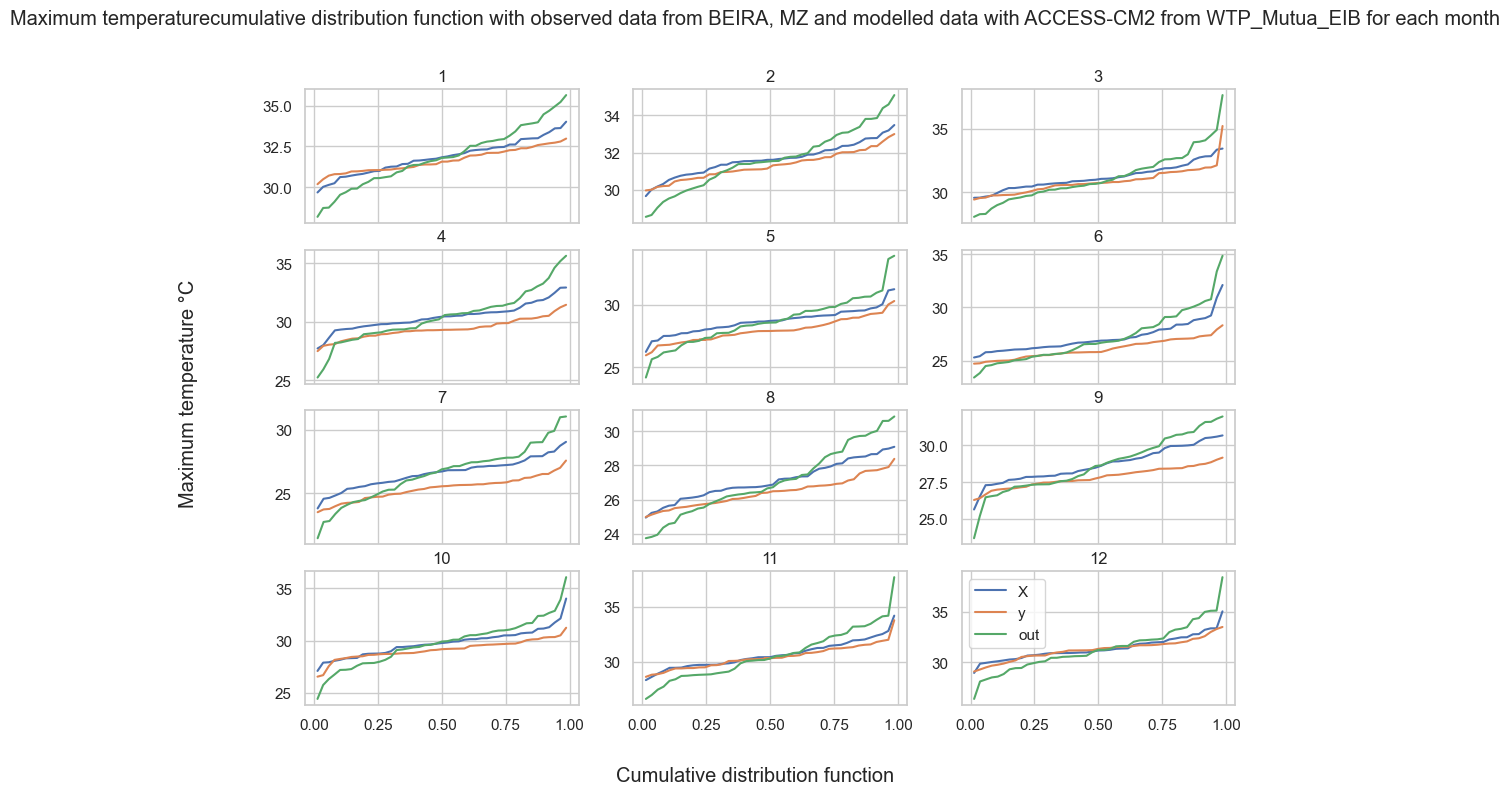

In [25]:
(tasmax_pred_bcsd_temp)=BC(df_tasmax,'temp_max','Bcsd_Temperature',name_station,name_project,name_model)# results without resample by month

mean absolute error
1.9809214936449304


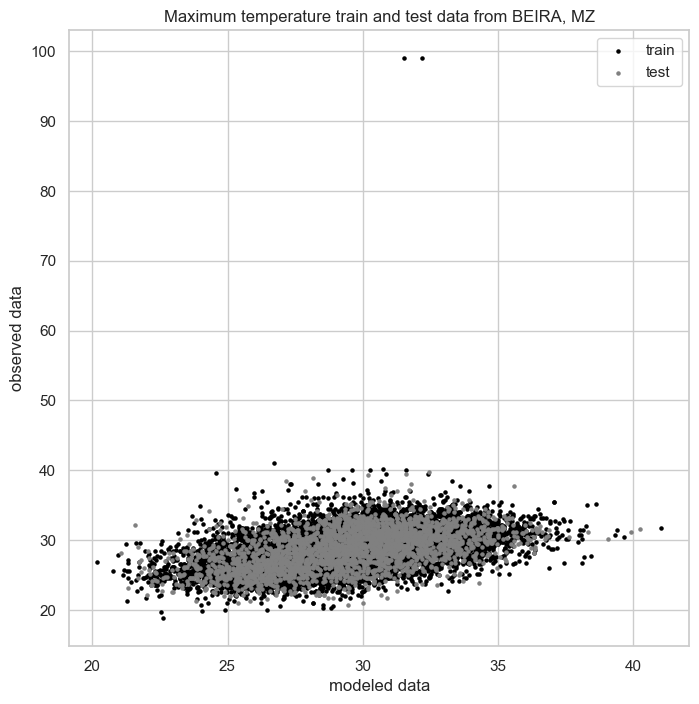

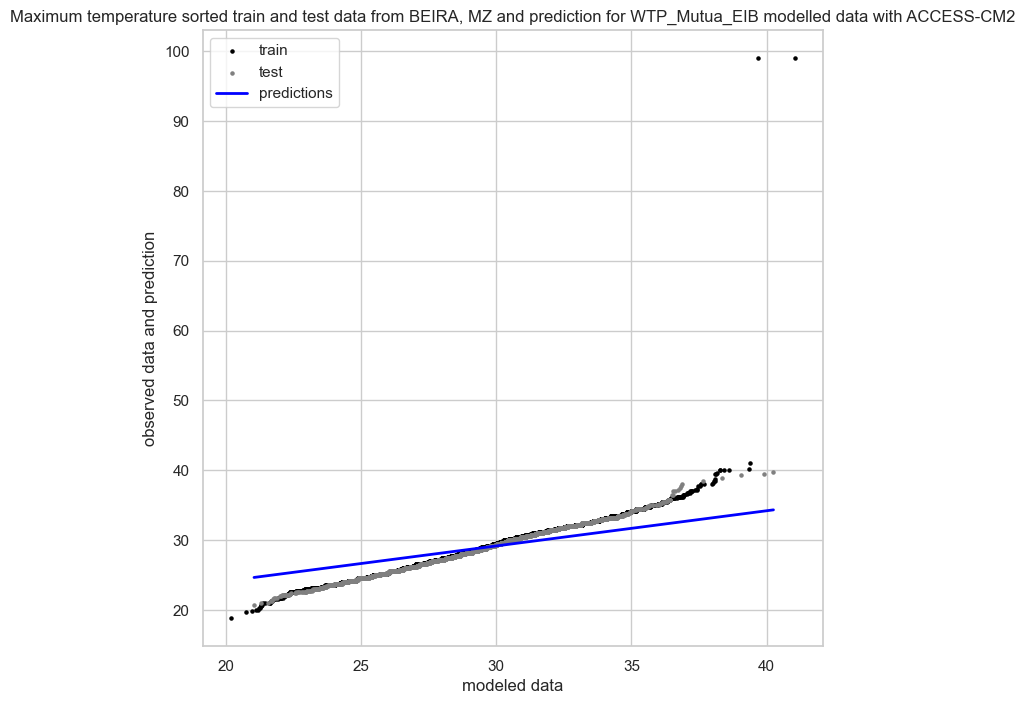

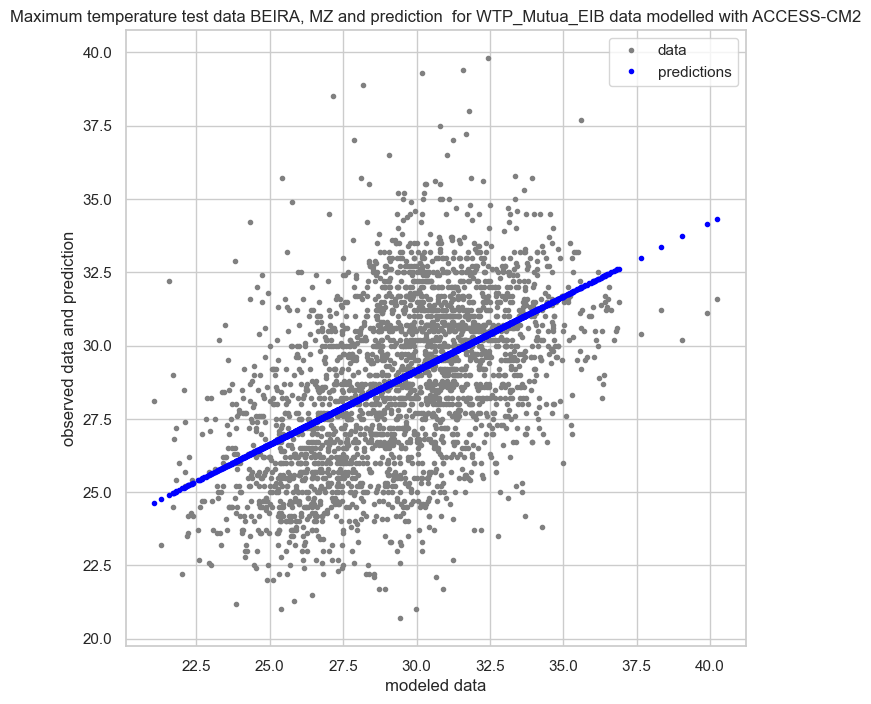

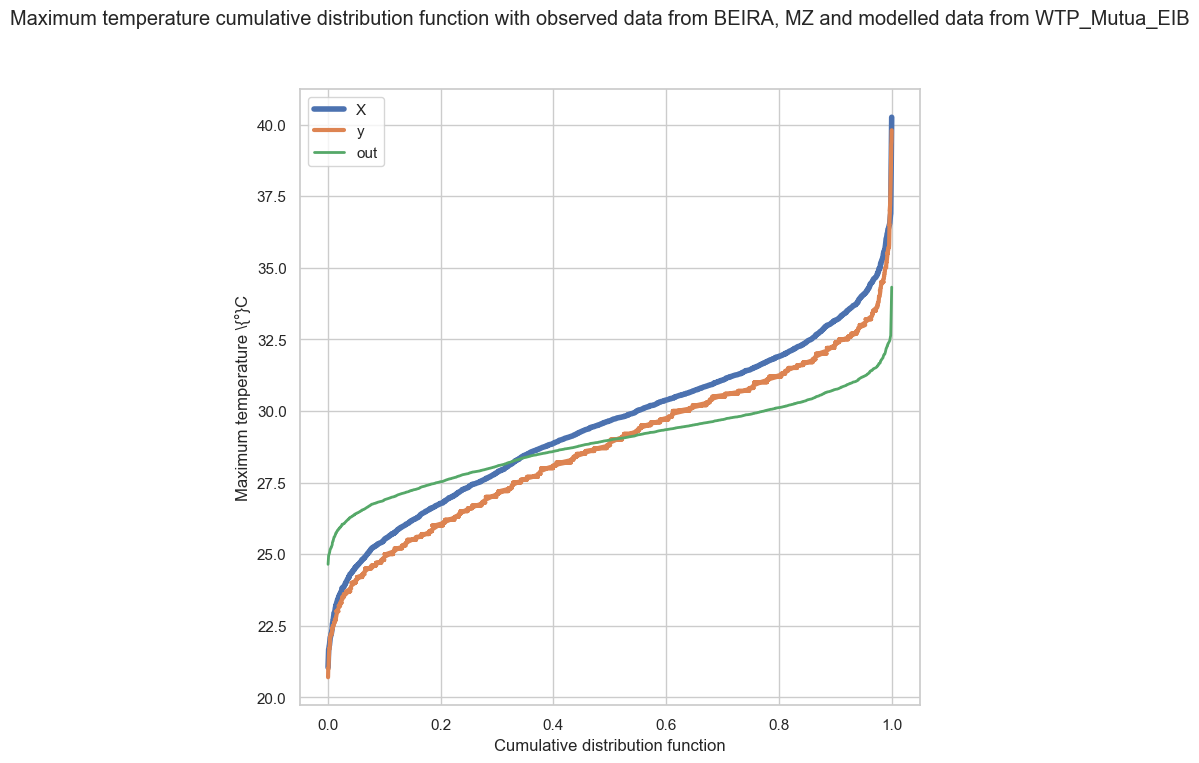

In [26]:
(tasmax_pred_q_lin)=BC(df_tasmax,'temp_max','Quantile_Linear_Regression',name_station,name_project,name_model)

R2 score
0.1830934839521844
0.18391015746163597
0.18247872073943228
Strategy chosen is uniform


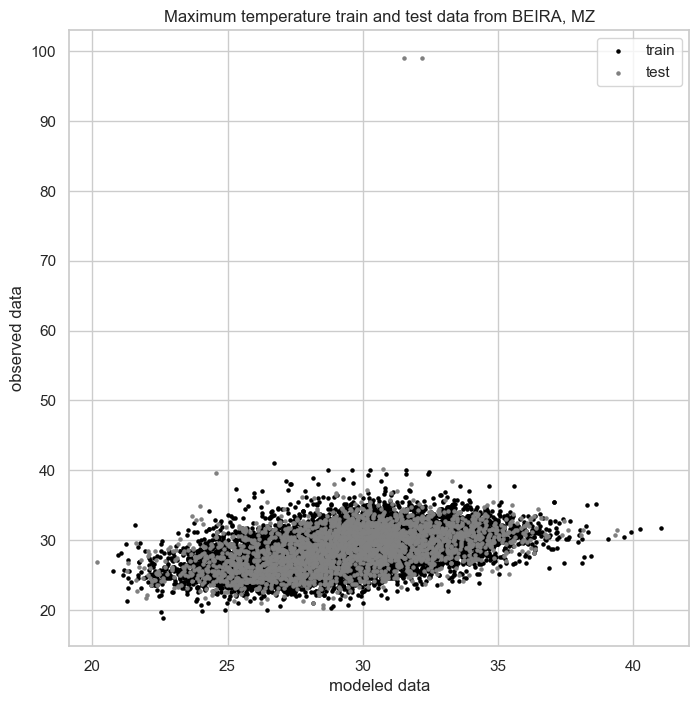

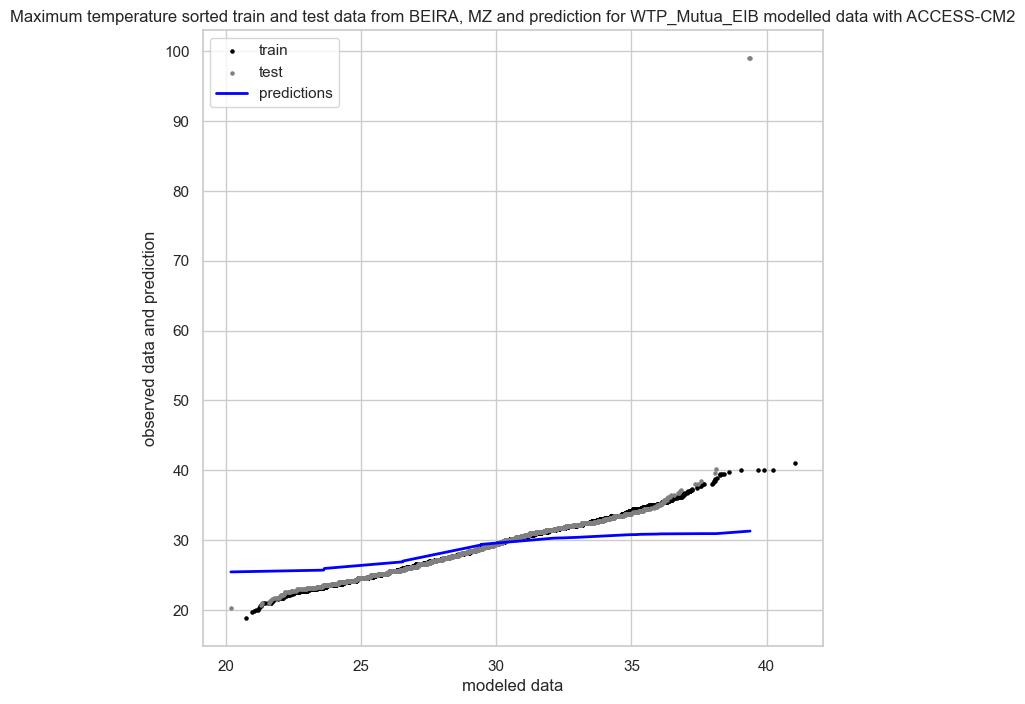

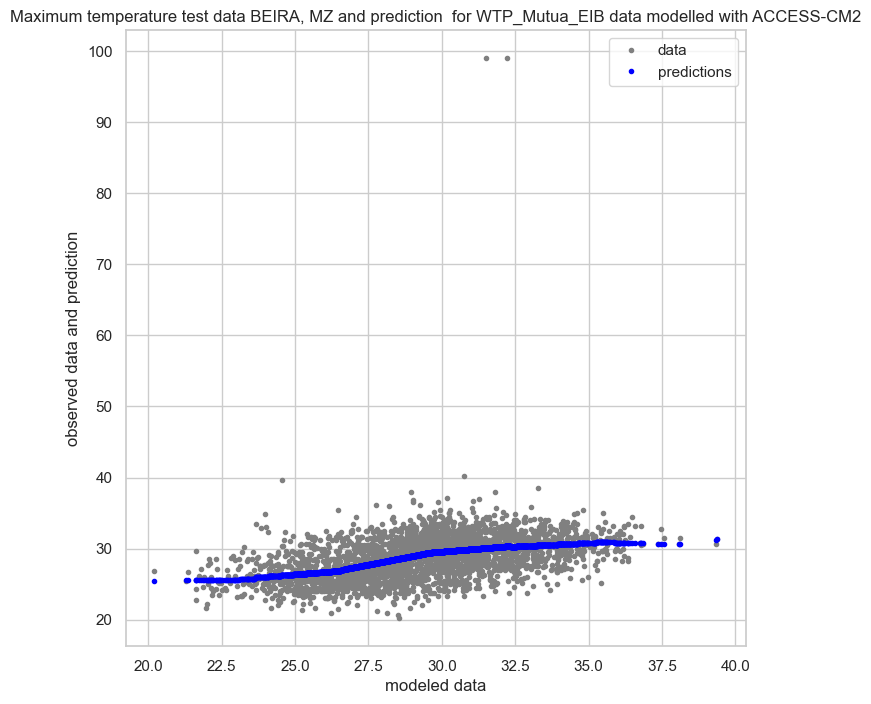

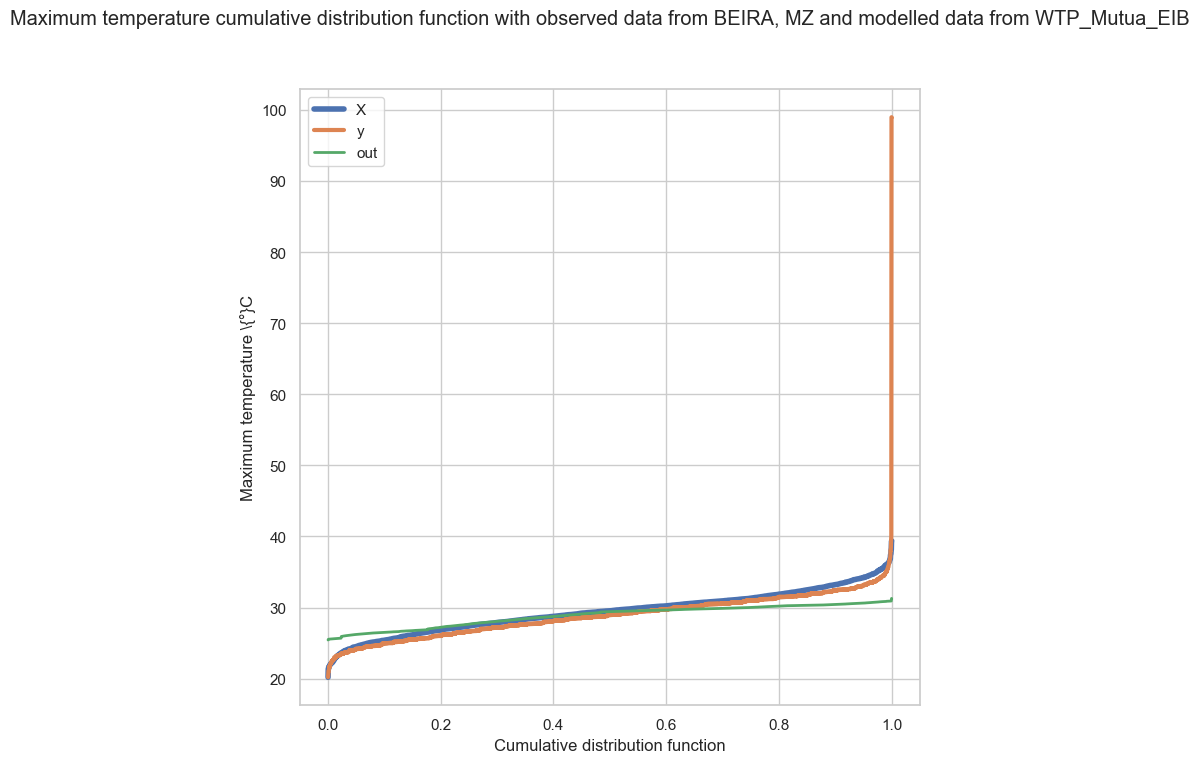

In [27]:
(tasmax_pred_p_reg)=BC(df_tasmax,'temp_max','piecewise_regressor',name_station,name_project,name_model)